# Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

# Objective

We need to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

#### Questions to address:

1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.

# Dataset

#### Dataset Used for Modeling:
* **ID:** Customer ID
* **Age:** Customer’s age in completed years
* **Experience:** #years of professional experience
* **Income:** Annual income of the customer (in thousand dollars)
* **ZIP Code:** Home Address ZIP code.
* **Family:** the Family size of the customer
* **CCAvg:** Average spending on credit cards per month (in thousand dollars)
* **Education:** Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* **Mortgage:** Value of house mortgage if any. (in thousand dollars)
* **Personal_Loan:** Did this customer accept the personal loan offered in the last campaign?
* **Securities_Account:** Does the customer have securities account with the bank?
* **CD_Account:** Does the customer have a certificate of deposit (CD) account with the bank? 
* **Online:** Do customers use internet banking facilities?
* **CreditCard:** Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Import the libraries

In [3]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build Logistic model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

### Load the dataset

In [4]:
# Load the dataset
loan_data = pd.read_csv("Loan_Modelling.csv")

In [5]:
# copying data to another varaible to avoid any changes to original data
data = loan_data.copy()

#### View the first 5 rows of dataset

In [6]:
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

#### View the last 5 rows of dataset

In [7]:
data.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

#### Check the shape of the dataset

In [8]:
data.shape

(5000, 14)

* Dataset has 5000 rows and 14 columns

#### Delete the ID column since it does not help our analysis

In [9]:
data.drop('ID' , axis=1 , inplace=True)

#### Check for any duplicates

In [10]:
data[data.duplicated()].count()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* Dataset has no duplicates

#### Check the datatypes of the columns

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


#### Insights:

* There are 12 integer columns and one float column
* Note that *Personal_Loan, Securities_Account, CD_Account, Online, and CreditCard* are int type. These needs to be converted to bool since these columns do not hold int values and instead hold a true or false values.

#### Convert Personal_Loan, Securities_Account, CD_Account, Online, and CreditCard to boolen datatypes

In [12]:
# Convert the int datatypes for Personal_Loan, Securities_Account, CD_Account, Online, and CreditCard
# columns to  bool type

bool_cols = ['Personal_Loan', 'Securities_Account', 'CD_Account', 'Online' , 'CreditCard' ]

for col in bool_cols:
    data[col] = data[col].astype('bool')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   bool   
 9   Securities_Account  5000 non-null   bool   
 10  CD_Account          5000 non-null   bool   
 11  Online              5000 non-null   bool   
 12  CreditCard          5000 non-null   bool   
dtypes: bool(5), float64(1), int64(7)
memory usage: 337.0 KB


#### Check for missing values

In [13]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* The data has no missing values

#### Look at the summary of dataset 

In [14]:
data.describe().T

count          mean          std      min      25%      50%  \
Age         5000.0     45.338400    11.463166     23.0     35.0     45.0   
Experience  5000.0     20.104600    11.467954     -3.0     10.0     20.0   
Income      5000.0     73.774200    46.033729      8.0     39.0     64.0   
ZIPCode     5000.0  93169.257000  1759.455086  90005.0  91911.0  93437.0   
Family      5000.0      2.396400     1.147663      1.0      1.0      2.0   
CCAvg       5000.0      1.937938     1.747659      0.0      0.7      1.5   
Education   5000.0      1.881000     0.839869      1.0      1.0      2.0   
Mortgage    5000.0     56.498800   101.713802      0.0      0.0      0.0   

                75%      max  
Age            55.0     67.0  
Experience     30.0     43.0  
Income         98.0    224.0  
ZIPCode     94608.0  96651.0  
Family          3.0      4.0  
CCAvg           2.5     10.0  
Education       3.0      3.0  
Mortgage      101.0    635.0

#### Insights:

* *Age* seems to be evenly distributed
* The min value of *Experience* is negative, which cannot be accurate.
* Mean of *Income* is greater than the median, possibly implying the right skewed dataset. We will explore this further in EDA section
* *Family* size seems to be evenly distributed
* *CCAvg* has a min value of 0 implying that some customers do not spend using their credit card
* Atleast 50% of the customers have no house mortage. This data seems to be right skewed heavily. More analysis to be done in EDA section
* Atleast 75% of the customers did not accept a *personal loan*
* Atleast 75% of the customers do not have a securities account with the bank
* Atleast 75% of the customers do not have a CD account with the bank
* Atleast 25% of the customers do not use internet banking facilities. Looking at the mean, we can claim that roughly 60% of the customers use internet banking.
* Only about 29% of the customers use a credit card issued by any other Bank

### Data Cleaning

#### Handle the data with negative values in experience column

In [15]:
 # Check the total number of rows that have negative values in Experience column
data['Experience'][data['Experience']<0].count()

52

* There are a total of 52 rows which have experience as negative. We can either take the absolute value assuming this to be data entry error or just delete it , considering that this represents only 1% of the dataset. Since this is not a huge value comopared to the original data size, we will go ahead and delete these instead of imputing them.

In [16]:
# Delete the rows where experience is negative
data.drop(data[data['Experience']<0].index , inplace=True)

In [17]:
# Check if all the rows with negative experience are dropped
data['Experience'][data['Experience']<0].count()

0

### Outlier Detection

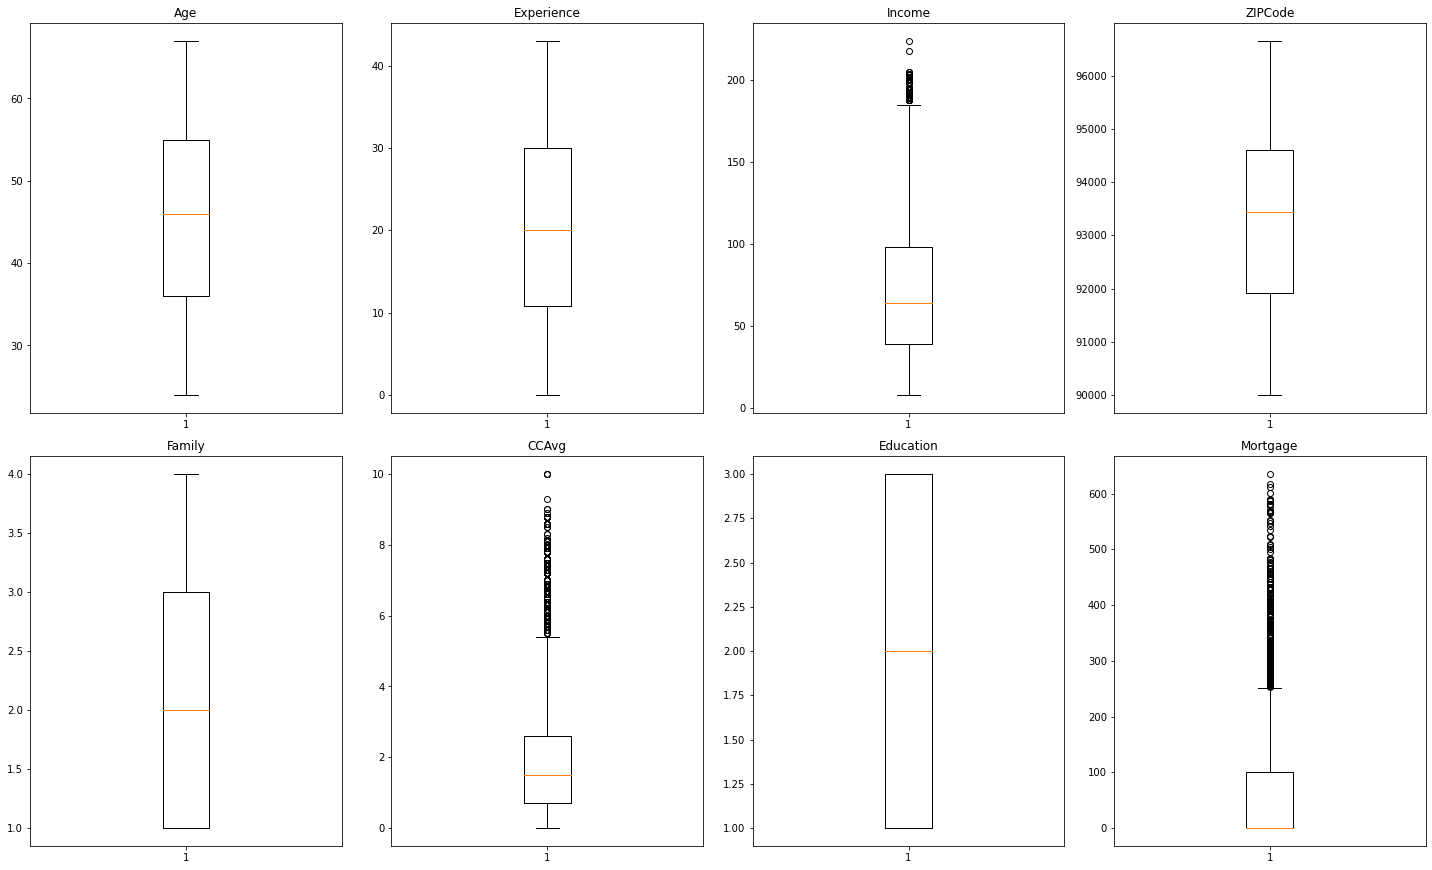

In [18]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Income, Mortgage, and CCAvg has upper outliers
* Mortgage has a lot of outliers

### Treating Outliers

* These outliers are not true outliers and the nature of these data poitns are such that they can have wide variability. I believe these are necessary for our analysis.A mortgage value of customers can have wide variability and therefore removing the ones that are deemed as outliers might take necessary information out. Therefore we will not remove them

### Preliminary Data Analysis

In [19]:
## Check how many users have a house mortage with All Life Bank 
data['Mortgage'].value_counts()

0      3422
98       17
119      16
103      16
91       16
       ... 
553       1
541       1
509       1
505       1
577       1
Name: Mortgage, Length: 347, dtype: int64

* There are a total of 3422 users who do not have a mortage with All Life bank and rest 1526 have mortgage

### Exploratory Data Analysis

### Univariate analysis

In [20]:
# Define a function to plot box plots and histograms with set of predefined features
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Visualize Age 

<Figure size 1440x720 with 0 Axes>

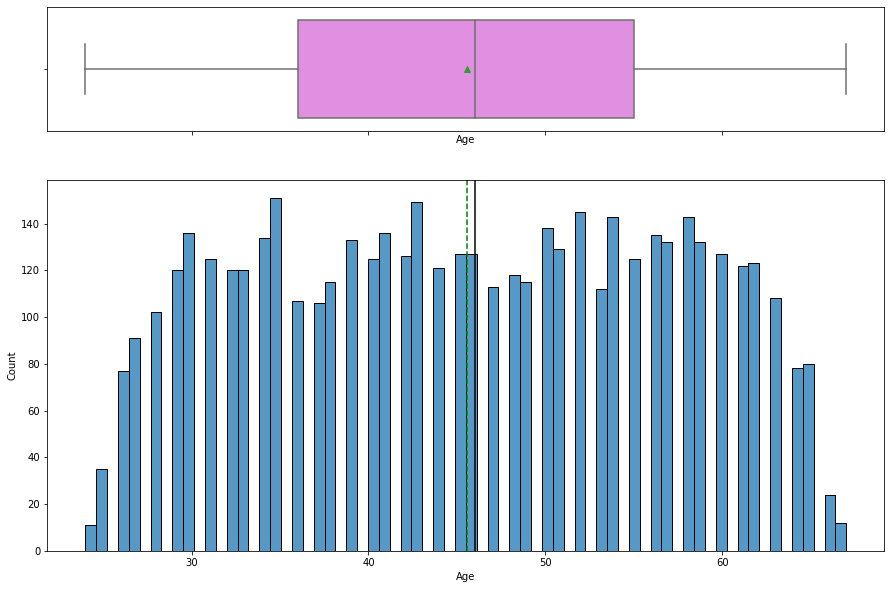

In [21]:
# Plot the histogram a nd boxplot of independant variable Age
plt.figure(figsize=(20,10)) 
histogram_boxplot(data, "Age", bins=70)

#### Visualize Experience

<Figure size 1440x720 with 0 Axes>

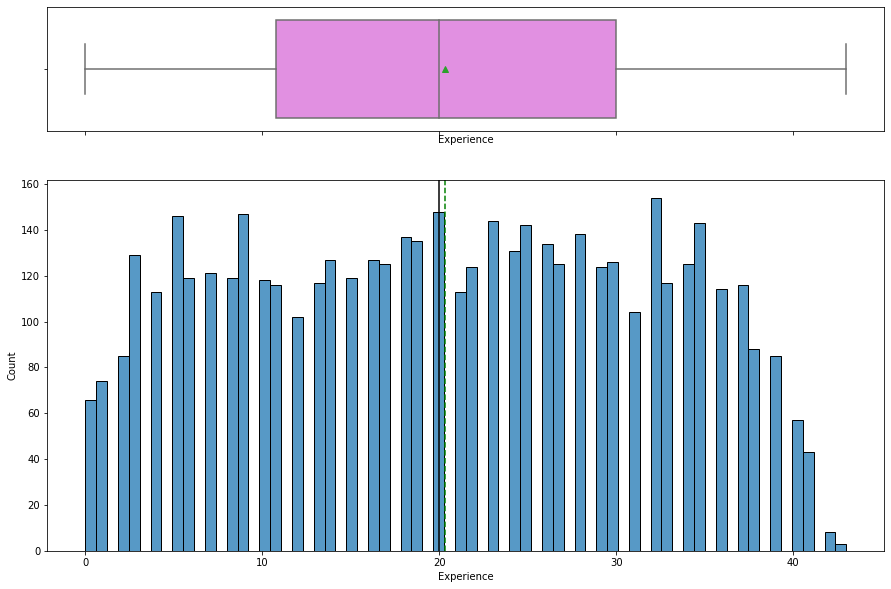

In [22]:
# Plot the histogram and boxplot of independant variable Experience
plt.figure(figsize=(20,10)) 
histogram_boxplot(data, "Experience", bins=70)

#### Visualize Income

<Figure size 1440x720 with 0 Axes>

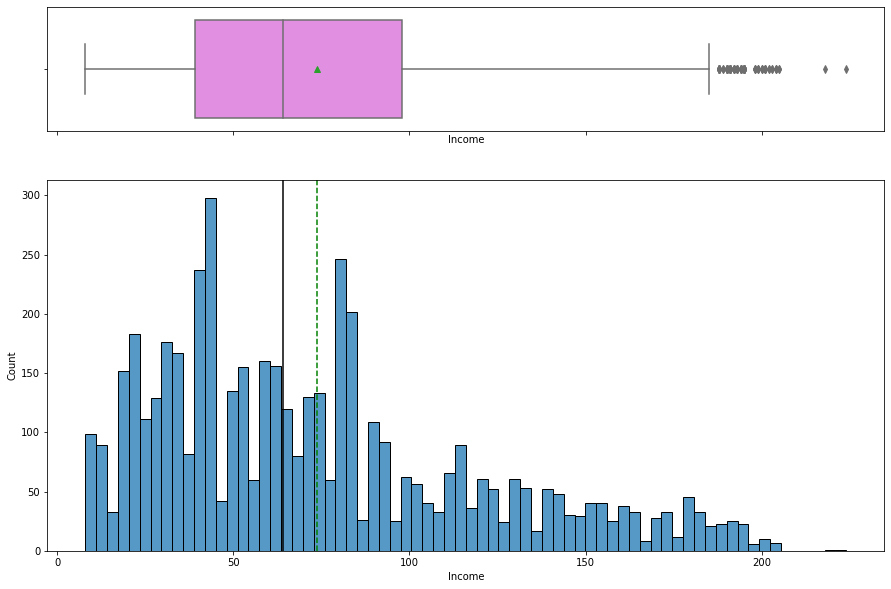

In [23]:
# Plot the histogram and boxplot of independant variable Income
plt.figure(figsize=(20,10)) 
histogram_boxplot(data, "Income", bins=70)

#### Visualize Avg Credit Card Spending

<Figure size 1440x720 with 0 Axes>

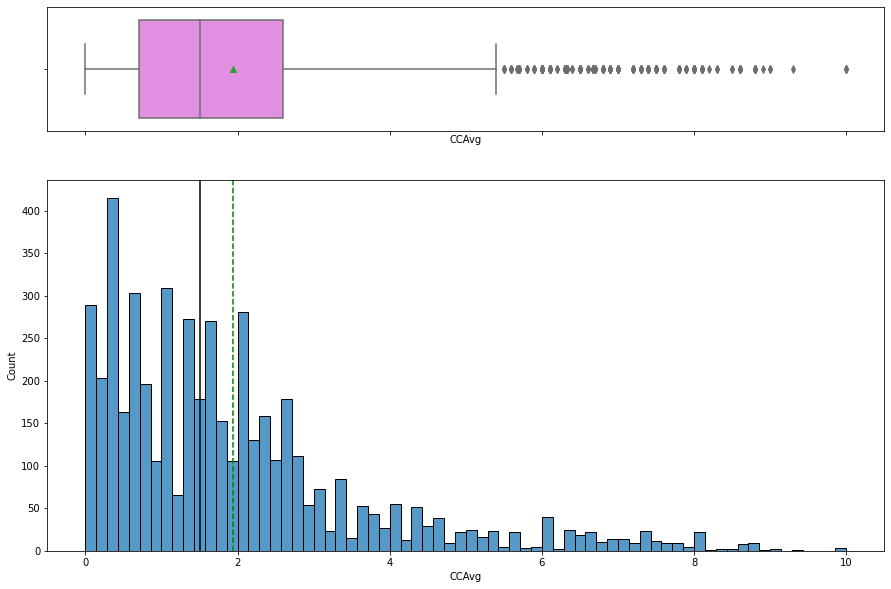

In [24]:
# Plot the histogram and boxplot of independant variable CCAvg
plt.figure(figsize=(20,10)) 
histogram_boxplot(data, "CCAvg", bins=70)

#### Function to create labeled barplots

In [25]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Visualization for Independant Boolean Variables

#### Plot Securities Account

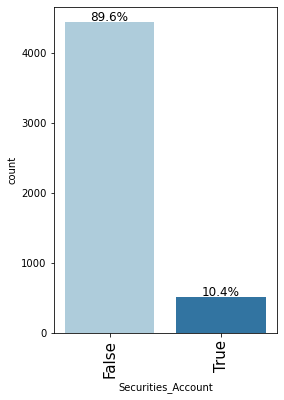

In [26]:
# Plot the barplot of independant variable Securities_Account
labeled_barplot(data, "Securities_Account", perc=True)

#### Plot CD Account

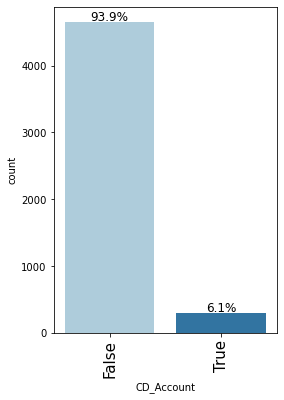

In [27]:
# Plot the barplot of independant variable CD Account
labeled_barplot(data, "CD_Account", perc=True)

#### Plot Online Variable

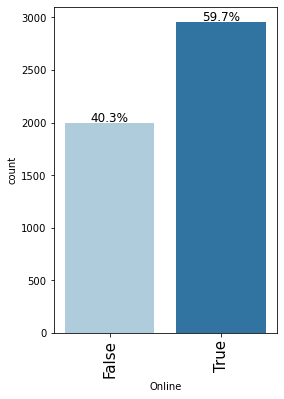

In [28]:
# Plot the barplot of independant variable Online
labeled_barplot(data, "Online", perc=True)

#### Visualize # of Customers who use Bank's Credit Card

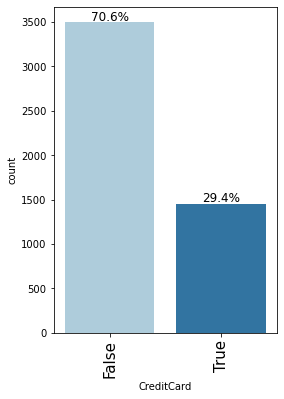

In [29]:
# Plot the barplot of independant variable Credit Card
labeled_barplot(data, "CreditCard", perc=True)

### Observations:
* Age and Experience of the customers follows a normal distribution and has no outliers
* Mean and Median of customer age and experience are close to each other, further reiterating the fact that the data has no skewness and normally disributed
* Income has some outliers and is slightly left skewed, implying that there are a few customers who make over 180k dollars anually.
* Average credit card speding (CCAvg) data is left skewed with some outliers, implying that there are a few customers who spend well over $6,000 per month.
* About 94% of the clients do not have a CD Account and 90% of the clients do not have securities account.
* 29% of the customers do not use the All Bank's credit card.
* About 40% of the customers do not use internet banking facilities.


## Bivariate Analysis

### Heatmap

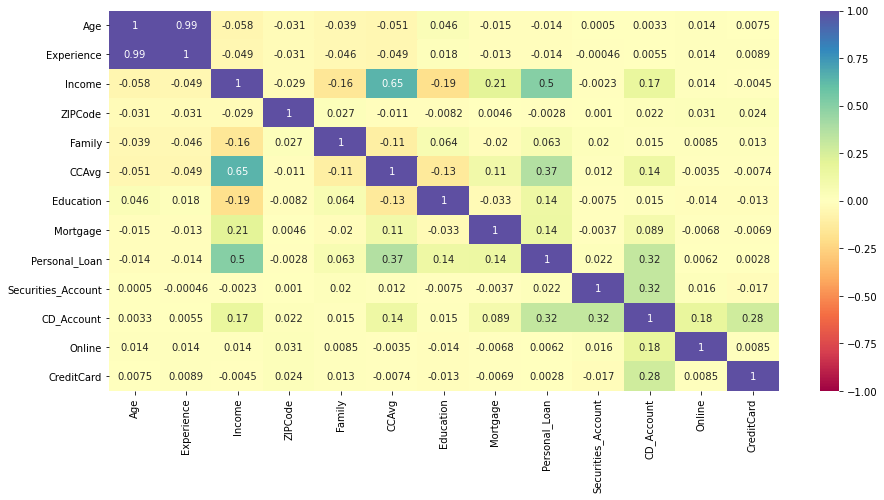

In [30]:
# Plot the heatmap to check for correlations
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

### Observations:
* Age is very highly correlated with years of experience, which makes intuitive sense.
* Income is highly correlated with CCAvg.Perhaps, customers who make more money tend to spend more.
* Income if also fairly correlated with personal loan. This could be because those who make more income can afford to take more loan
* Income has a negative correlation with education, which goes against our intuition.
* Income has negative correlation against family

### Pairplot to visualize the correlations

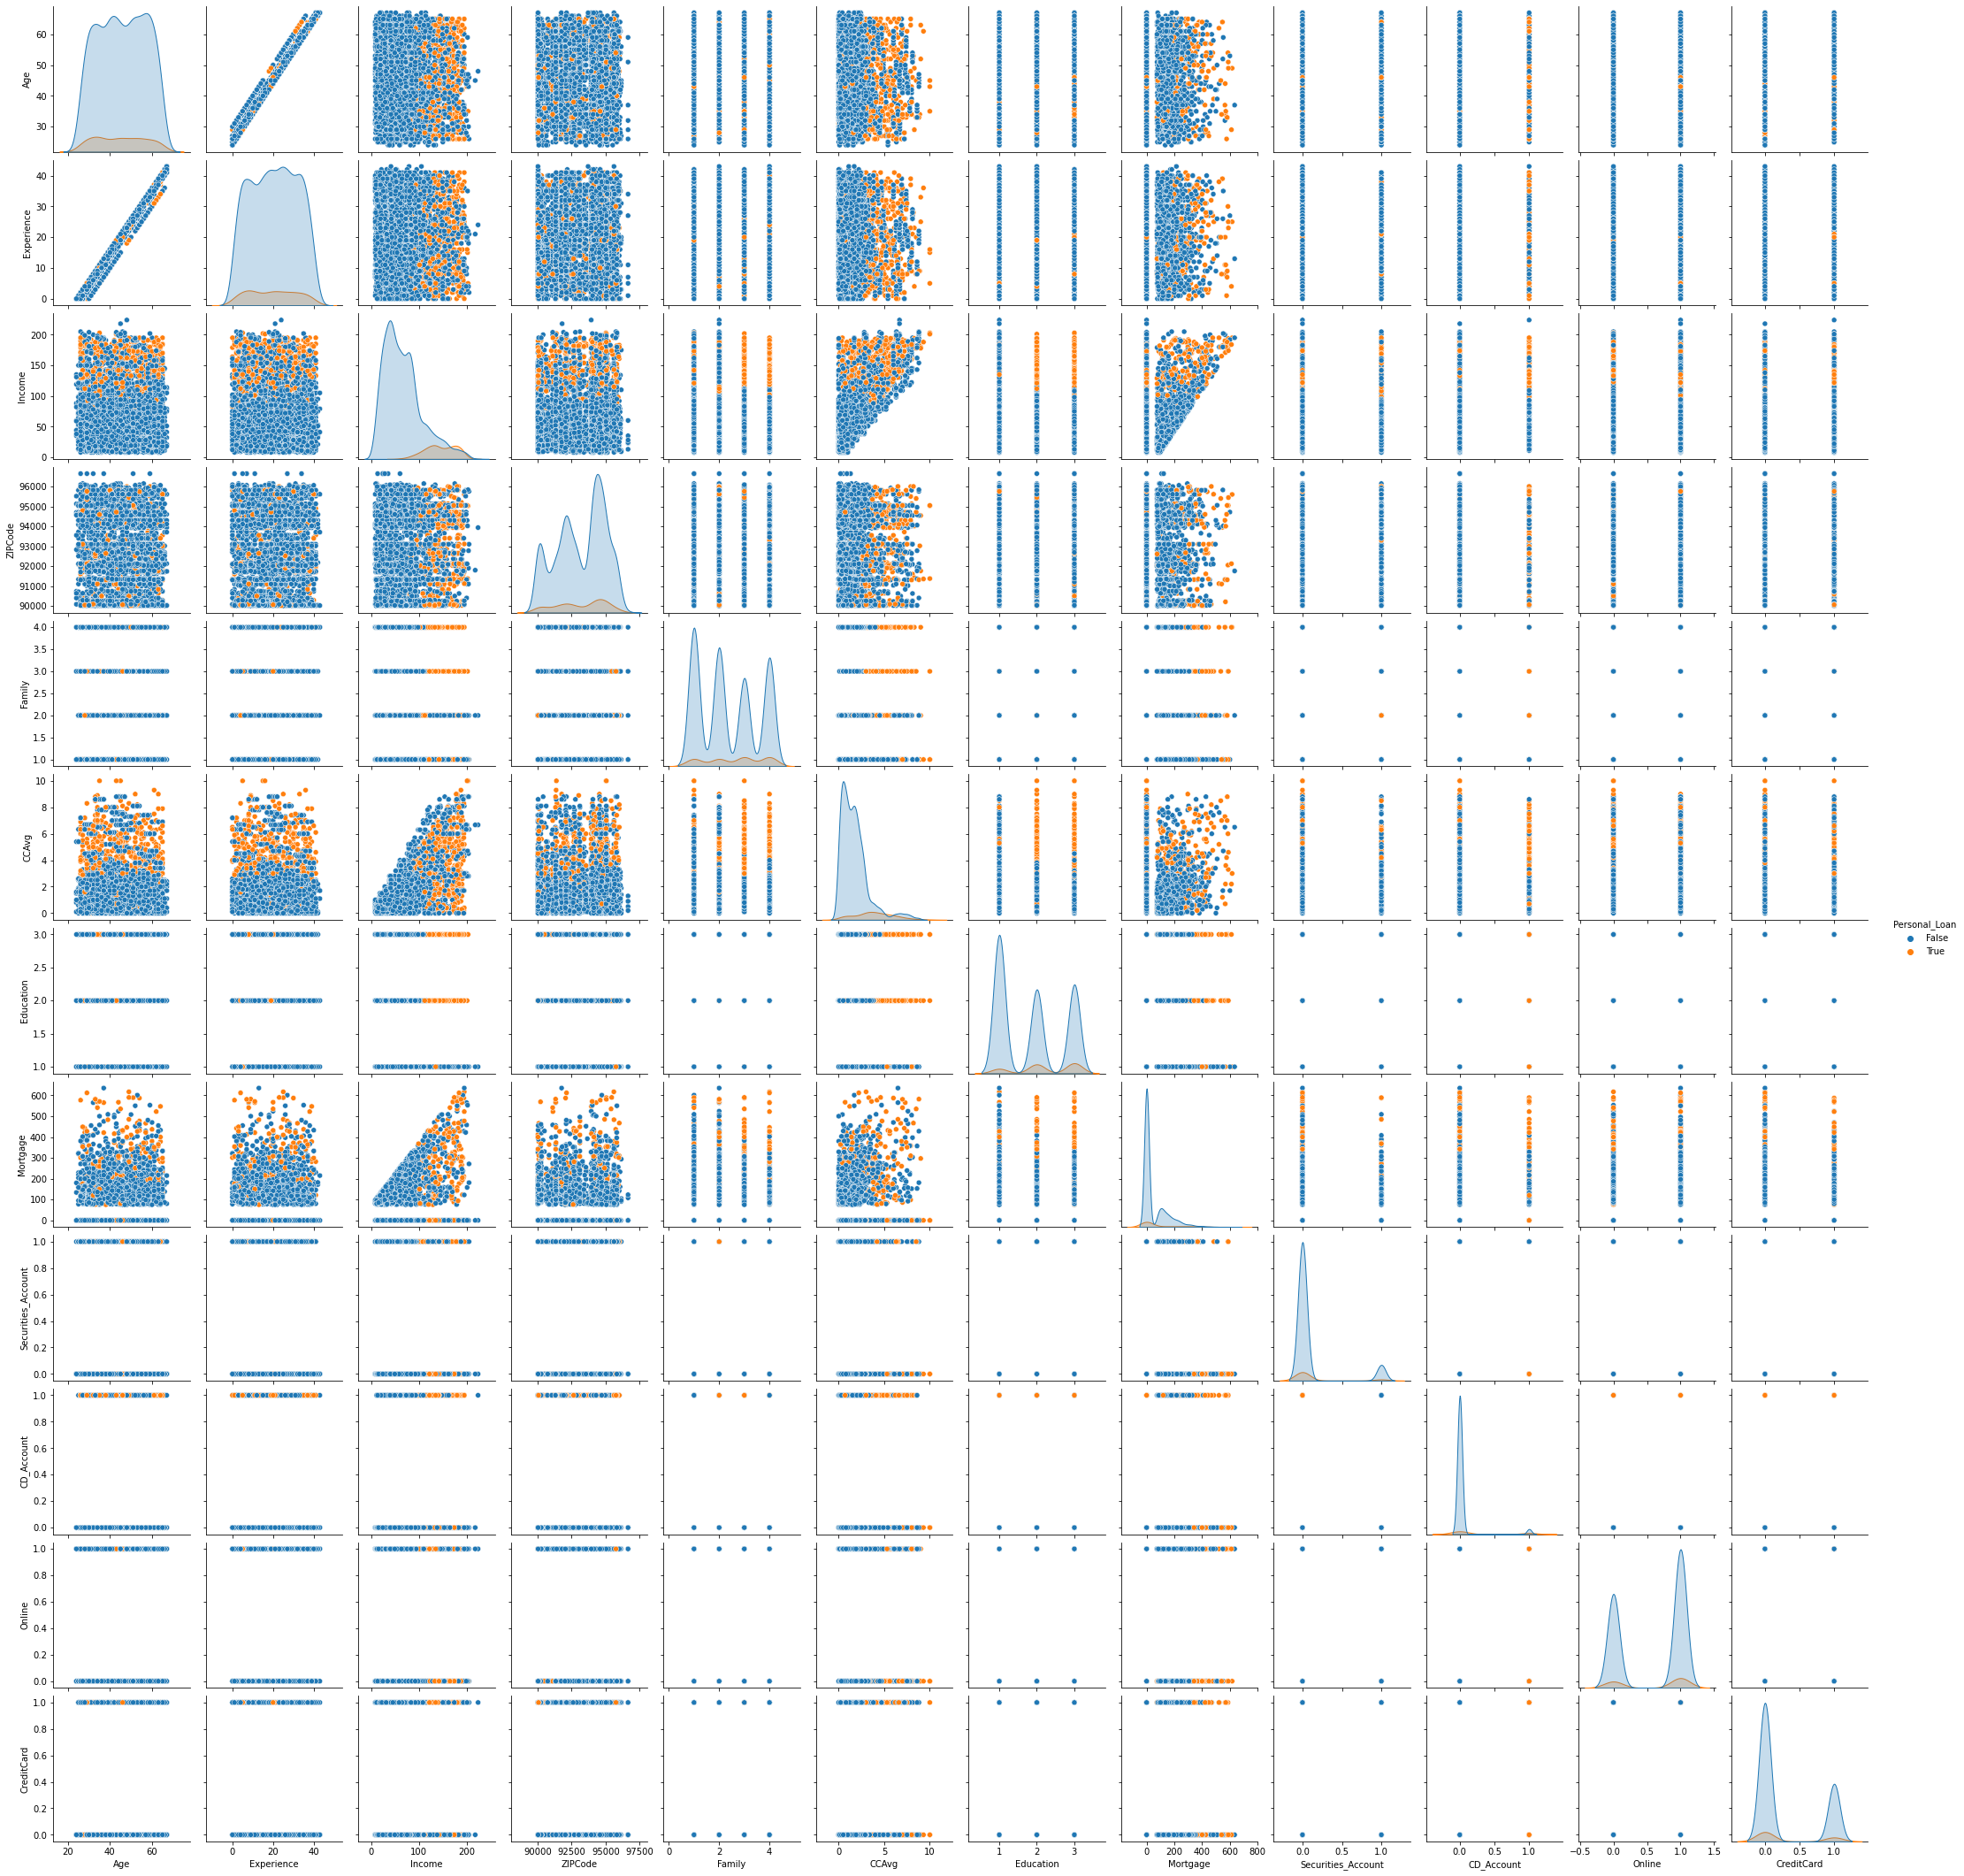

In [31]:
# Build the pair plot to see visualize the correlations
sns.pairplot(data=data, hue="Personal_Loan")
plt.show()

### Plot Personal Loan (Dependent Variable) Vs Independant Variables:

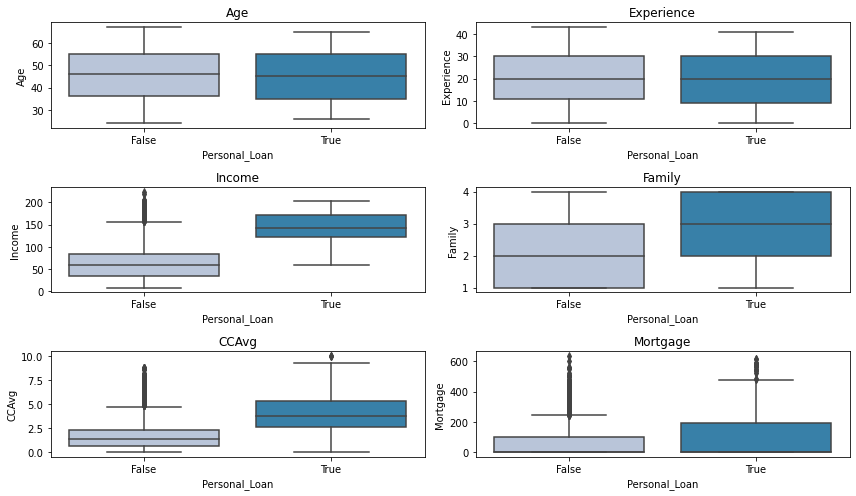

In [32]:
### Plot Personal Loan vs Age, Experience, Income,Family, CCAvg 
cols = data[
    [
        "Age",
        "Experience",
        "Income",
        "Family",
        "CCAvg",
        "Mortgage"
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Personal_Loan"], data[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

#### Observations:
* Loan acceptance does not seem to have any bearing on the age, and experience of the customer.
* Income if also fairly correlated with personal loan. This could be because those who make more income can afford to take more loan. 
* On an average, customers with higher income tend to accept personal loans more than customers with lower income group.
* On an average, customers with bigger family tend to accept personal loans more than customers with lower income group.
* Customers with higher credit card spending ,on an average , tend to accept personal loans more thna customers with lower credit card spending.
* Loan acceptance of customers with higher value of house mortage tends to be slightly higher than those with lower house mortgage. Althought there are some significant outliers (i.e there are significant number of customers who have a higher value of house mortgage but do not accept persoanl loan). There is not a strong correlation in this metricsn though.

### Plot the Visualizations for Boolean Columns Vs Personal Loan

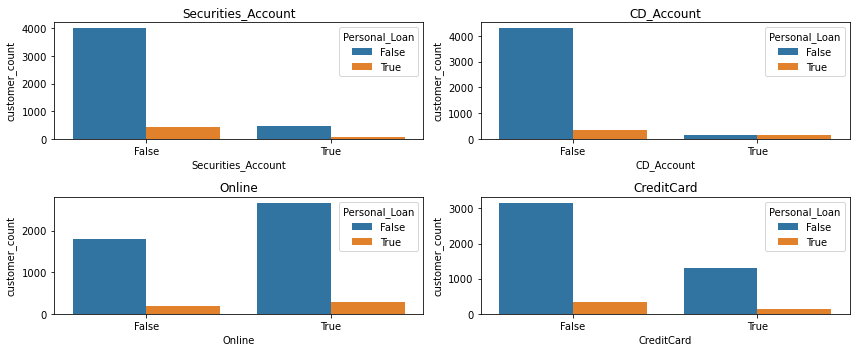

In [33]:
### Plot barplot - Personal Loan vs Securities_Account, CD_Account, Online, and CreditCard

cols = data[
    [
        "Securities_Account",
        "CD_Account",
        "Online",
        "CreditCard",
        "Personal_Loan"
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    if variable != 'Personal_Loan':
        plt.subplot(3, 2, i + 1)
        data_plt = data.groupby([data['Personal_Loan'],data[variable]]).agg(customer_count = (variable , 'count')).reset_index()
        sns.barplot(data=data_plt,hue='Personal_Loan',x=variable , y='customer_count')
        plt.tight_layout()
        plt.title(variable)
plt.show()

In [34]:
# print the statistics for the above plotted variables

print(data['Securities_Account'].groupby([data['Personal_Loan'] , data['Securities_Account']]).count())
print(data['CD_Account'].groupby([data['Personal_Loan'] , data['CD_Account']]).count())
print(data['Online'].groupby([data['Personal_Loan'] , data['Online']]).count())
print(data['CreditCard'].groupby([data['Personal_Loan'] , data['CreditCard']]).count())


Personal_Loan  Securities_Account
False          False                 4012
               True                   456
True           False                  420
               True                    60
Name: Securities_Account, dtype: int64
Personal_Loan  CD_Account
False          False         4306
               True           162
True           False          340
               True           140
Name: CD_Account, dtype: int64
Personal_Loan  Online
False          False     1805
               True      2663
True           False      189
               True       291
Name: Online, dtype: int64
Personal_Loan  CreditCard
False          False         3156
               True          1312
True           False          337
               True           143
Name: CreditCard, dtype: int64


In [35]:
print("{}% of the users who did not accept personal loan have securities account & {}% of the users who accepted personal loan have a securities account".format( round(456/(4012+456),1)*100 , round(60/(420+60),1)*100 ))

print("\n {}% of the users who did not accept personal loan have CD account & {}% of the users who accepted personal loan have a CD account".format( round(162/(4306+162),2)*100 , round(140/(340+140),1)*100 ))

print("\n {}% of the users who did not accept personal loan use Online & {}% of the users who accepted personal loan use Online banking".format( round(2663/(1805+2663),1)*100 , round(291/(291+189),1)*100 ))

print("\n {}% of the users who did not accept personal loan use credit card from different bank & {}% of the users who accepted personal loan use credit card from different bank".format( round(1312/(1312+3156),1)*100 , round(143/(143+337),1)*100 ))

10.0% of the users who did not accept personal loan have securities account & 10.0% of the users who accepted personal loan have a securities account

 4.0% of the users who did not accept personal loan have CD account & 30.0% of the users who accepted personal loan have a CD account

 60.0% of the users who did not accept personal loan use Online & 60.0% of the users who accepted personal loan use Online banking

 30.0% of the users who did not accept personal loan use credit card from different bank & 30.0% of the users who accepted personal loan use credit card from different bank


### <a id='link1'>Summary of EDA </a>
**Data Description:**
* Dependent variable is the Personal Loan which is of categorical data type.
* Securities_Account, Online, CD_Account, and CreditCard are of categorical teger type while other variables are of integer type
* There are no missing values in the dataset.
* Experience column has 52 negative values which have been handled.


**Observations from EDA:**

* **Age** and **Experience** does not seem to have much impact on personal loan acceptance
<br>

* **Income** seems to have a correlation with personal loan. This could be because those who make more income can afford to take more loan. 
<br>

* Roughly 50% of customers who have CD Account have accepted the personal loan in the last campaign.
<br>

* 10.0% of the users who did not accept personal loan have **securities account** & 10.0% of the users who accepted personal loan have a securities account. Securities account does not seem to have much correlation in personal loan acceptance. We will explore this further in our models.
<br>

* 4.0% of the users who did not accept personal loan have **CD account** & 30.0% of the users who accepted personal loan have a CD account. This imples that CD account might have a bearing on customer loan acceptance.
<br>

* 60.0% of the users who did not accept personal loan use **Online banking** & 60.0% of the users who accepted personal loan use Online banking, implying that usage of internet banking might not have a bearing on customer loan acceptance.
<br>

* 30.0% of the users who did not accept personal loan use **credit card** from different bank & 30.0% of the users who accepted personal loan use credit card from different bank. Credit card holding does not seem to have much impact on customer loan accpetance.


### Actions for data preparation:


* As seen from thee pairplot and heatmap above, Experience and Age are highly correlated . Therefore we will remove Age from our analysis

##### Drop Age column

In [602]:
# dropping Age
data = data.drop(["Age"], axis=1)

In [603]:
# Install the unzipcode package to retrieve the city/county/state names from zip codes
# ! pip install uszipcode

In [604]:
# Extract the City name from zip codes
from uszipcode import SearchEngine, SimpleZipcode, Zipcode
search = SearchEngine()

def get_city(code):
    city = search.by_zipcode(code).major_city
    return city if city else 'None'

data['City'] = data['ZIPCode'].apply(get_city)
        

In [605]:
# Get the Unique count of city names
data['City'].nunique()

245

Since the count of cities is huge (245) , we will retrieve the county names instead of city names to help reduce the dimensions when we create dummy variable

#### Extract the County name from zip code

In [606]:
# Import packages to extract details of zipcode
from uszipcode import SearchEngine, SimpleZipcode, Zipcode
search = SearchEngine()

# define a function to get the county names for the correponding zip code
def get_county(code):
    county = search.by_zipcode(code).county
    return county if county else 'None'

data['County'] = data['ZIPCode'].apply(get_county)

        

In [607]:
# Get the Unique count of County names
data['County'].nunique()

39

Since there are only 39 counties compared to 245 states for this dataset, we will use County.

In [608]:
# We will drop the City since we are using County name instead
data.drop('City' , axis = 1, inplace=True)

In [609]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Experience          4948 non-null   int64  
 1   Income              4948 non-null   int64  
 2   ZIPCode             4948 non-null   int64  
 3   Family              4948 non-null   int64  
 4   CCAvg               4948 non-null   float64
 5   Education           4948 non-null   int64  
 6   Mortgage            4948 non-null   int64  
 7   Personal_Loan       4948 non-null   bool   
 8   Securities_Account  4948 non-null   bool   
 9   CD_Account          4948 non-null   bool   
 10  Online              4948 non-null   bool   
 11  CreditCard          4948 non-null   bool   
 12  County              4948 non-null   object 
dtypes: bool(5), float64(1), int64(6), object(1)
memory usage: 532.1+ KB


**Note that county variable is of object type. We need to convert this to string**

In [610]:
# Convert the county datatype from object to category
data['County']= data['County'].astype('category')

In [611]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Experience          4948 non-null   int64   
 1   Income              4948 non-null   int64   
 2   ZIPCode             4948 non-null   int64   
 3   Family              4948 non-null   int64   
 4   CCAvg               4948 non-null   float64 
 5   Education           4948 non-null   int64   
 6   Mortgage            4948 non-null   int64   
 7   Personal_Loan       4948 non-null   bool    
 8   Securities_Account  4948 non-null   bool    
 9   CD_Account          4948 non-null   bool    
 10  Online              4948 non-null   bool    
 11  CreditCard          4948 non-null   bool    
 12  County              4948 non-null   category
dtypes: bool(5), category(1), float64(1), int64(6)
memory usage: 499.8 KB


### Drop the ZIPCode column since we have captured that information in County Column

In [612]:
# Drop column ZIPCode
data.drop('ZIPCode' , axis=1, inplace=True)

In [613]:
data.head()

Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0           1      49       4    1.6          1         0          False   
1          19      34       3    1.5          1         0          False   
2          15      11       1    1.0          1         0          False   
3           9     100       1    2.7          2         0          False   
4           8      45       4    1.0          2         0          False   

   Securities_Account  CD_Account  Online  CreditCard                County  
0                True       False   False       False    Los Angeles County  
1                True       False   False       False    Los Angeles County  
2               False       False   False       False        Alameda County  
3               False       False   False       False  San Francisco County  
4               False       False   False        True    Los Angeles County

In [614]:
# Get the unique values for education
data['Education'].unique()

array([1, 2, 3])

#### Rename the data in Education column to give intuitive values
1: Undergrad; 2: Graduate;3: Advanced/Professional

In [615]:
# Rename the datappoints in Education Column to meangful names

data.replace({'Education' : { 1: 'Education_1_Undergrad' , 2: 'Education_2_Graduate' , 3 : 'Education_3_Professional' }} , inplace=True)

In [616]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Experience          4948 non-null   int64   
 1   Income              4948 non-null   int64   
 2   Family              4948 non-null   int64   
 3   CCAvg               4948 non-null   float64 
 4   Education           4948 non-null   object  
 5   Mortgage            4948 non-null   int64   
 6   Personal_Loan       4948 non-null   bool    
 7   Securities_Account  4948 non-null   bool    
 8   CD_Account          4948 non-null   bool    
 9   Online              4948 non-null   bool    
 10  CreditCard          4948 non-null   bool    
 11  County              4948 non-null   category
dtypes: bool(5), category(1), float64(1), int64(4), object(1)
memory usage: 461.1+ KB


In [617]:
# Convert the education column from object to category
data['Education']= data['Education'].astype('category')

In [618]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Experience          4948 non-null   int64   
 1   Income              4948 non-null   int64   
 2   Family              4948 non-null   int64   
 3   CCAvg               4948 non-null   float64 
 4   Education           4948 non-null   category
 5   Mortgage            4948 non-null   int64   
 6   Personal_Loan       4948 non-null   bool    
 7   Securities_Account  4948 non-null   bool    
 8   CD_Account          4948 non-null   bool    
 9   Online              4948 non-null   bool    
 10  CreditCard          4948 non-null   bool    
 11  County              4948 non-null   category
dtypes: bool(5), category(2), float64(1), int64(4)
memory usage: 427.4 KB


#### Create Dummy variables using one hot encoding

In [619]:
# creating dummy varibles
model_data = pd.get_dummies(
    data,
    columns=[
        "Education",
        "Securities_Account",
        "CD_Account",
        "Online",
        "CreditCard",
        "County"    ],
    drop_first=True,
)
model_data.head()

Experience  Income  Family  CCAvg  Mortgage  Personal_Loan  \
0           1      49       4    1.6         0          False   
1          19      34       3    1.5         0          False   
2          15      11       1    1.0         0          False   
3           9     100       1    2.7         0          False   
4           8      45       4    1.0         0          False   

   Education_Education_2_Graduate  Education_Education_3_Professional  \
0                               0                                   0   
1                               0                                   0   
2                               0                                   0   
3                               1                                   0   
4                               1                                   0   

   Securities_Account_True  CD_Account_True  Online_True  CreditCard_True  \
0                        1                0            0                0   
1                        1                0            0                0   
2                        0                0            0                0   
3                        0                0            0                0   
4                        0                0            0                1   

   County_Butte County  County_Contra Costa County  County_El Dorado County  \
0                    0                           0                        0   
1                    0                           0                        0   
2                    0                           0                        0   
3                    0                           0                        0   
4                    0                           0                        0   

   County_Fresno County  County_Humboldt County  County_Imperial County  \
0                     0                       0                       0   
1                     0                       0                       0   
2                     0                       0                       0   
3                     0                       0                       0   
4                     0                       0                       0   

   County_Kern County  County_Lake County  County_Los Angeles County  \
0                   0                   0                          1   
1                   0                   0                          1   
2                   0                   0                          0   
3                   0                   0                          0   
4                   0                   0                          1   

   County_Marin County  County_Mendocino County  County_Merced County  \
0                    0                        0                     0   
1                    0                        0                     0   
2                    0                        0                     0   
3                    0                        0                     0   
4                    0                        0                     0   

   County_Monterey County  County_Napa County  County_None  \
0                       0                   0            0   
1                       0                   0            0   
2                       0                   0            0   
3                       0                   0            0   
4                       0                   0            0   

   County_Orange County  County_Placer County  County_Riverside County  \
0                     0                     0                        0   
1                     0                     0                        0   
2                     0                     0                        0   
3                     0                     0                        0   
4                     0                     0                        0   

   County_Sacramento County  County_San Benito County  \
0                         0          

## 1. Logistic Regression

**Creating training and test sets.**

In [620]:
# define X and Y variables for the model
X = model_data.drop(["Personal_Loan"], axis=1)
Y = model_data["Personal_Loan"]

## Split Data

In [621]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [622]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3463, 49)
Shape of Test set :  (1485, 49)
Percentage of classes in training set:
False    0.903263
True     0.096737
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
False    0.902357
True     0.097643
Name: Personal_Loan, dtype: float64


**Observation:**
The training and test data has comparable proportion of True and False, thereby making sure that there is no bias in either of the data segment

### Building the model

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a liability customer will buy a personal loan but in reality does not - Misuse of marketing expenditure and resources
2. Predicting a liability customer will not buy a personal loan but in reality he will - Potential lost opportunity

### Which case is more important? 

* If we predict that the liability customer will buy a personal loan but in reality does not, then we misuse sales and marketing budget without resulting in top line growth.

* If we predict a liability customer will not buy a personal loan but in reality he will, then we are accountable for potential lost opportunity to capitalize on these customers.

Both the cases are important, since one represents a misuse of capital and the other one represents a lost opportunity. A more accurate weightage on one type of error over the other can be estimated given more details about the profit margin and financial health of the company. A company with a higher margin and a strong balance sheet might want to capitalize on the customers and not care so much about optimizing its cost structure. In such a case the 2nd error becomes more important than the first one. However, if the company is cash strapped, then the company wants to maximise its resources and for such a company , minimising 1st error  becomes important. We can only make this judgement after knowing more details about the company. But in our current scenario, due to the lack on enought information, I am assuming both errors to be equally important and hence try to maximize f1_score.

### How to reduce both these errors?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [623]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [624]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression (with Sklearn library)

In [625]:
# Building the model

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

#### Checking model performance on training set

In [626]:
# predicting on training set
y_pred_train = lg.predict(X_train)

In [627]:
print("Training set performance:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1:", f1_score(y_train, y_pred_train))

Training set performance:
Accuracy: 0.958995090961594
Precision: 0.8814229249011858
Recall: 0.6656716417910448
F1: 0.7585034013605443


#### Checking performance on test set

In [628]:
# predicting on the test set
y_pred_test = lg.predict(X_test)

In [629]:
print("Test set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))

Test set performance:
Accuracy: 0.9562289562289562
Precision: 0.8773584905660378
Recall: 0.6413793103448275
F1: 0.7410358565737052


**Observations**

- The training and testing f1_scores are 0.75 and 0.74 respectively.

- f1_score on the train and test sets are comparable.

- This shows that the model is a good representation of the underlying data.

We will use stats model to build the model in order to identify the factors that have significant impact

### Logistic Regression (with statsmodels library)

In [630]:
# Create X and Y variables for the model
X = model_data.drop(["Personal_Loan"], axis=1)
Y = model_data["Personal_Loan"]

X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [631]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3463
Model:                          Logit   Df Residuals:                     3413
Method:                           MLE   Df Model:                           49
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6382
Time:                        20:43:19   Log-Likelihood:                -398.22
converged:                      False   LL-Null:                       -1100.7
Covariance Type:            nonrobust   LLR p-value:                5.213e-262
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                -13.5635      0.823    -16.479      0.000     -15.177     -11.950
Experience                             0.0094      0.009   

In [632]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0   0.96015  0.686567   0.874525  0.769231

**Observations**

- Negative values of the coefficient for the variables **Securities_Account_True** ,**CreditCard_True**, and **Online_True** (in addition to most county variables) shows that probability of customer accepting a loan has a negative impact with the increase of corresponding attribute value.

- Positive values of the coefficient show that that probability of customer accepting a loan increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.


### Multicollinearity 

In [633]:
# Check the variation inflation factor for the variables in the dataset
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                 27.363438
Experience                             1.023297
Income                                 1.939045
Family                                 1.056214
CCAvg                                  1.791335
Mortgage                               1.062154
Education_Education_2_Graduate         1.286028
Education_Education_3_Professional     1.255194
Securities_Account_True                1.149742
CD_Account_True                        1.328442
Online_True                            1.051999
CreditCard_True                        1.119135
County_Butte County                    1.034967
County_Contra Costa County             1.147146
County_El Dorado County                1.043750
County_Fresno County                   1.044265
County_Humboldt County                 1.065808
County_Imperial County                 1.005994
County_Kern County                     1.100612
County_Lake County                     1.013594
Count

Based on the VIF scores, the variables do not seem to have collinearity. Althought we have already removed some of the correlated variables based on the heatmap done earliler

In [634]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3463
Model:                          Logit   Df Residuals:                     3413
Method:                           MLE   Df Model:                           49
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6382
Time:                        20:43:19   Log-Likelihood:                -398.22
converged:                      False   LL-Null:                       -1100.7
Covariance Type:            nonrobust   LLR p-value:                5.213e-262
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                -13.5635      0.823    -16.479      0.000     -15.177     -11.950
Experience                             0.0094      0.009   

Variables **County_Imperial County**, **County_Merced County** ,and **County_Tuolumne County** are insignificant with a p_value of 1. We will drop these and re-evaluate the model

In [635]:
X_train1 = X_train.drop(
    ["County_Imperial County", "County_Merced County", "County_Tuolumne County"], axis=1
)

logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit()

print(lg1.summary())

         Current function value: 0.115049
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3463
Model:                          Logit   Df Residuals:                     3416
Method:                           MLE   Df Model:                           46
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6380
Time:                        20:43:19   Log-Likelihood:                -398.41
converged:                      False   LL-Null:                       -1100.7
Covariance Type:            nonrobust   LLR p-value:                3.764e-264
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                -13.5891      0.823    -16.517      0.000     -15.202     -

All the County names are insignificant (and therefore we will delete the **county** columns) , indicating that county has no bearing on loan acceptance by a customer

### Drop All Counties

In [636]:
X_train1.columns

Index(['const', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage',
       'Education_Education_2_Graduate', 'Education_Education_3_Professional',
       'Securities_Account_True', 'CD_Account_True', 'Online_True',
       'CreditCard_True', 'County_Butte County', 'County_Contra Costa County',
       'County_El Dorado County', 'County_Fresno County',
       'County_Humboldt County', 'County_Kern County', 'County_Lake County',
       'County_Los Angeles County', 'County_Marin County',
       'County_Mendocino County', 'County_Monterey County',
       'County_Napa County', 'County_None', 'County_Orange County',
       'County_Placer County', 'County_Riverside County',
       'County_Sacramento County', 'County_San Benito County',
       'County_San Bernardino County', 'County_San Diego County',
       'County_San Francisco County', 'County_San Joaquin County',
       'County_San Luis Obispo County', 'County_San Mateo County',
       'County_Santa Barbara County', 'County_Santa Clara Co

In [637]:
# Drop all the columns of County and build the model again

# get all columns that have county in its name and drop them
cols = [col for col in X_train1.columns if 'County' in col]
X_train2 = X_train1.drop(cols, axis=1)

# build the logit model
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit()

print(lg2.summary())

Optimization terminated successfully.
         Current function value: 0.118617
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3463
Model:                          Logit   Df Residuals:                     3451
Method:                           MLE   Df Model:                           11
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6268
Time:                        20:43:19   Log-Likelihood:                -410.77
converged:                       True   LL-Null:                       -1100.7
Covariance Type:            nonrobust   LLR p-value:                2.597e-289
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                -12.9268      0.702    

Columns **Experience** and **Mortgage** are insignificant. We will delete one at a time and check the model and significance of parameters before deleting the others. We will delete Experience first since it is 

#### Drop Experience column

In [638]:
# Drop Experience column and build the model again

X_train3 = X_train2.drop('Experience', axis=1)

logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit()

print(lg3.summary())

Optimization terminated successfully.
         Current function value: 0.118866
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3463
Model:                          Logit   Df Residuals:                     3452
Method:                           MLE   Df Model:                           10
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6260
Time:                        20:43:50   Log-Likelihood:                -411.63
converged:                       True   LL-Null:                       -1100.7
Covariance Type:            nonrobust   LLR p-value:                5.076e-290
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                -12.6462      0.662    

Mortgage is still insignificant. We will delete it and evaluate the model again

#### Drop Mortgage Column

In [639]:
# Drop Mortgage column and build the model again

X_train4 = X_train3.drop('Mortgage', axis=1)

logit4 = sm.Logit(y_train, X_train4.astype(float))
lg4 = logit4.fit()

print(lg4.summary())
# print(lg4.params.values[1])

Optimization terminated successfully.
         Current function value: 0.119188
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3463
Model:                          Logit   Df Residuals:                     3453
Method:                           MLE   Df Model:                            9
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6250
Time:                        20:43:54   Log-Likelihood:                -412.75
converged:                       True   LL-Null:                       -1100.7
Covariance Type:            nonrobust   LLR p-value:                1.209e-290
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                -12.5848      0.659    

**Now no feature has p-value greater than 0.05, so we'll consider the features in *X_train4* as the final ones and *lg4* as final model.**

### Coefficient interpretations

* Coefficient of some levels of education, income, and family, and CD account are positive , indicating that an increase in these is associated with an increase in chances of a customer accepting a personal loan. 

* Coefficient of Securities_Account_True,Online banking , and credit card are negative, indicating that an increase in these is associated with a decrease in chances of a ciustomer accepting a loan.

###  Converting coefficients to odds

In [640]:
# converting coefficients to odds
odds = np.exp(lg4.params)

# finding the percentage change
perc_change_odds = (np.exp(lg4.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train4.columns).T

const    Income     Family      CCAvg  \
Odds          0.000003  1.060865   1.782789   1.165926   
Change_odd% -99.999658  6.086517  78.278873  16.592586   

             Education_Education_2_Graduate  \
Odds                              44.070328   
Change_odd%                     4307.032808   

             Education_Education_3_Professional  Securities_Account_True  \
Odds                                  45.234118                 0.466089   
Change_odd%                         4423.411806               -53.391051   

             CD_Account_True  Online_True  CreditCard_True  
Odds               49.586511     0.480606         0.311907  
Change_odd%      4858.651083   -51.939394       -68.809310

### Coefficient interpretations

* Income: Holding all other features constant a 1 unit change in Income will increase the odds of a customer accepting a loan by 1.06 times or a 6.08% increase in odds of accepting a loan.

* Family: Holding all other features constant a 1 unit change in the family size will increase the odds of a customer accepting a loan by 1.78 times or a increase of 78% in odds of a customer accepting a loan.
 
* Education_Education_2_Graduate : The odds of a customer accepting a loan  for customer with graduate degree is 44.07 times higher than the person with an undergraduate degree or 4307% higher odds of a customer accepting loan. Similarly, The odds of a customer accepting a loan  for customer with professional degree is 45.23 times higher than the person with an undergraduate degree or 4423% higher odds of a customer accepting loan.

* Securities_Account_True: The odds of a customer accepting a loan  for customer who has secirities account is .46 times lower than the person without a securities account or 53.39% lower odds of a customer accepting loan.

These entail the most important coefficient interpretations. Other coefficients in the table can be interpreted in similar manner.

#### Checking model performance on the training set

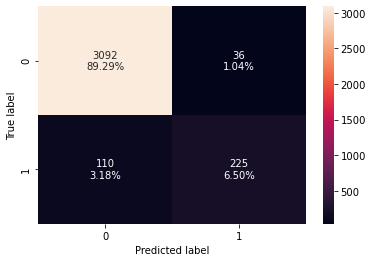

In [641]:
# creating confusion matrix
confusion_matrix_statsmodels(lg4, X_train4, y_train)

In [642]:
# Check the model performance for training data
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg4, X_train4, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0   0.95784  0.671642   0.862069  0.755034

#### ROC-AUC

#### ROC-AUC on training set

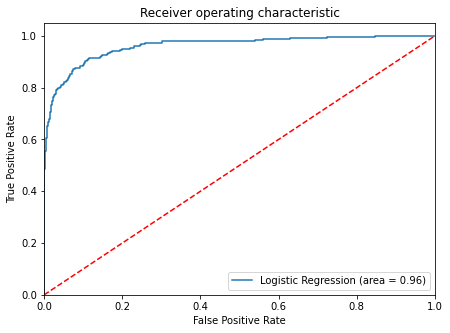

In [643]:
# Build the ROC curve and plot it

logit_roc_auc_train = roc_auc_score(y_train, lg4.predict(X_train4))
fpr, tpr, thresholds = roc_curve(y_train, lg4.predict(X_train4))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**The area under the curve  for training dataset of 0.96 , which indicates good performance on training data**

### Model Performance Improvement

* Let's see if the **f1 score** can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [644]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg4.predict(X_train4))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.08082270370820034


#### Checking model performance on training set

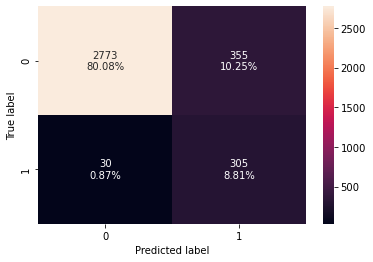

In [645]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg4, X_train4, y_train, threshold=optimal_threshold_auc_roc
)

In [646]:
# checking performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg4, X_train4, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.888825  0.910448   0.462121  0.613065

* Recall has increased, but precision, accuracy and F1 score has decreased

#### Let's use Precision-Recall curve and see if we can find a better threshold

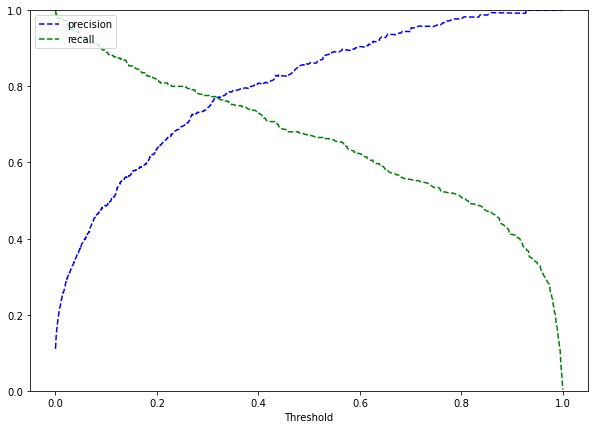

In [647]:
# Calculate the recall-precision curve

y_scores = lg4.predict(X_train4)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

# Define a function to plot the precision recall curve and plot the same
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

At the threshold of 0.32 we get a good mix of Recall and Precision. Lets use this as optimal threshold and reevaluate our model performance

In [648]:
# setting the threshold
optimal_threshold_curve = 0.32

#### Checking model performance on training set

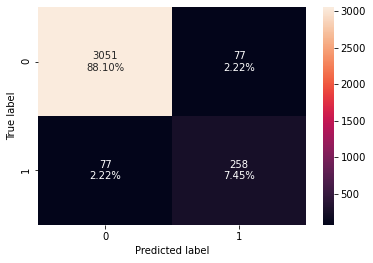

In [649]:
# creating confusion matrix
confusion_matrix_statsmodels(lg4, X_train4, y_train, threshold=optimal_threshold_curve)

In [650]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg4, X_train4, y_train, threshold=optimal_threshold_curve
)
print("\n Training performance at {}:".format(optimal_threshold_curve))
print("--------------------------------")
log_reg_model_train_perf_threshold_curve


 Training performance at 0.32:
--------------------------------


Accuracy    Recall  Precision        F1
0   0.95553  0.770149   0.770149  0.770149

### Observations
* Model is performing well on training set.
* At the optimal threshold value of 0.32, there's a significant improvement in the model performance on almost all metrics , except Recall, which decreased slightly.

### Model Performance Summary


In [651]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-auc_roc_curve_threshold",
    "Logistic Regression-precision_recall_curve_threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  \
Accuracy                      0.957840   
Recall                        0.671642   
Precision                     0.862069   
F1                            0.755034   

           Logistic Regression-auc_roc_curve_threshold  \
Accuracy                                      0.888825   
Recall                                        0.910448   
Precision                                     0.462121   
F1                                            0.613065   

           Logistic Regression-precision_recall_curve_threshold  
Accuracy                                            0.955530     
Recall                                              0.770149     
Precision                                           0.770149     
F1                                                  0.770149

### Evaluate Performance on Test Data

**Dropping the columns from the test set that were dropped from the training set**

In [652]:
X_test4 = X_test[list(X_train4.columns)]

### 1. Test Performance - Default Threshold

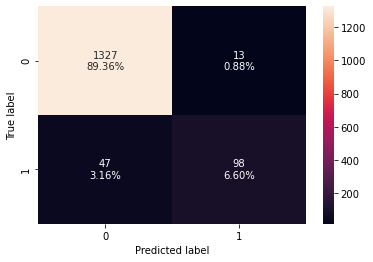

In [653]:
# creating confusion matrix
confusion_matrix_statsmodels(lg4, X_test4, y_test)

In [654]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg4, X_test4, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.959596  0.675862   0.882883  0.765625

* ROC curve on test set

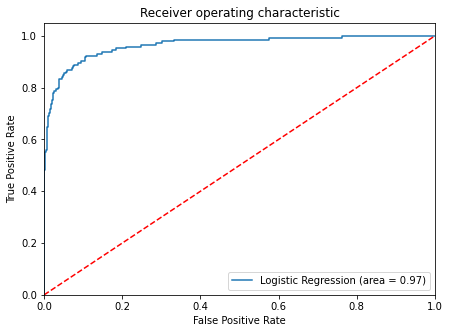

In [655]:
logit_roc_auc_train = roc_auc_score(y_test, lg4.predict(X_test4))
fpr, tpr, thresholds = roc_curve(y_test, lg4.predict(X_test4))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### 2. Test Performance - Threshold=0.080 (Optimal threshold per the AUC ROC Curve)

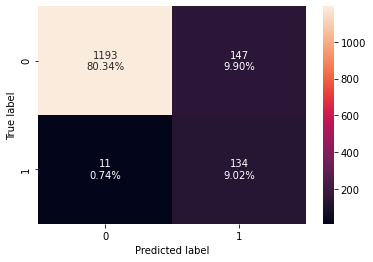

In [656]:
# creating confusion matrix
confusion_matrix_statsmodels(lg4, X_test4, y_test, threshold=optimal_threshold_auc_roc)

In [657]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg4, X_test4, y_test, threshold=optimal_threshold_auc_roc
)
print("\nTest performance at {}:".format(round(optimal_threshold_auc_roc, 2)))
print("---------------------------")
log_reg_model_test_perf_threshold_auc_roc


Test performance at 0.08:
---------------------------


Accuracy    Recall  Precision        F1
0  0.893603  0.924138   0.476868  0.629108

### 3. Test Performance - Threshold = 0.32 (Optimal threshold as per recall precision curve)

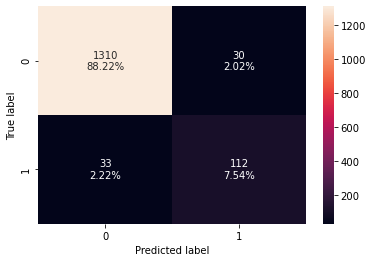

In [658]:
# creating confusion matrix
confusion_matrix_statsmodels(lg4, X_test4, y_test, threshold=optimal_threshold_curve)

In [659]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg4, X_test4, y_test, threshold=optimal_threshold_curve
)
print("\nTest performance at {}:".format(optimal_threshold_curve))
print("------------------------")
log_reg_model_test_perf_threshold_curve


Test performance at 0.32:
------------------------


Accuracy    Recall  Precision        F1
0  0.957576  0.772414   0.788732  0.780488

### Model performance summary


In [660]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.08 Threshold",
    "Logistic Regression-0.32 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.08 Threshold  \
Accuracy                      0.957840                            0.888825   
Recall                        0.671642                            0.910448   
Precision                     0.862069                            0.462121   
F1                            0.755034                            0.613065   

           Logistic Regression-0.32 Threshold  
Accuracy                             0.955530  
Recall                               0.770149  
Precision                            0.770149  
F1                                   0.770149

In [661]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.08 Threshold",
    "Logistic Regression-0.32 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.08 Threshold  \
Accuracy                      0.959596                            0.893603   
Recall                        0.675862                            0.924138   
Precision                     0.882883                            0.476868   
F1                            0.765625                            0.629108   

           Logistic Regression-0.32 Threshold  
Accuracy                             0.957576  
Recall                               0.772414  
Precision                            0.788732  
F1                                   0.780488

In [662]:
# Primt summary of the logistic model
print(lg4.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3463
Model:                          Logit   Df Residuals:                     3453
Method:                           MLE   Df Model:                            9
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6250
Time:                        20:44:26   Log-Likelihood:                -412.75
converged:                       True   LL-Null:                       -1100.7
Covariance Type:            nonrobust   LLR p-value:                1.209e-290
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                -12.5848      0.659    -19.108      0.000     -13.876     -11.294
Income                                 0.0591      0.004   

### Conclusion Based on Logistic Regression :

##### Significant Features :
* Income
* Family
* Education_Education_2_Graduate
* Education_Education_3_Professional
* CCAvg
* Securities_Account_True
* CD_Account_True
* Online_True
* CreditCard_True

#### Insights:
* The logistic model predicts the likelihood of customer accepting the loan, with the F1 score for the model to be 0.77 and 0.78 on training and testing data, respectively.

* All the logistic regression models have been generalised to fit both the training and testing data well.

* Coefficient of Income , Family , CCAvg, Graduate Education, Graduate Professional , and CD Account are positive implying that an increase in these attributes is associated with an increase in the likelihood of a customer accpeting a loan.

* Coefficient of Securities_Account_True (customer who has a securities account) and Credit_card_true (Customer who uses credit card from another bank) are negative, implying that an when these factors hold true, there is an association with a decrease in likelihood of customer accpeting a loan.

* Threshold of 0.32 produces the optimal F1 Score for both training and test data 



## Decision Tree Model

In [663]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3463, 50)
Shape of Test set :  (1485, 50)
Percentage of classes in training set:
False    0.903263
True     0.096737
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
False    0.902357
True     0.097643
Name: Personal_Loan, dtype: float64


### Build Decision Tree Model

### Model 1 : Preliminary Model

In [664]:
# build a decision tree using gini criterion
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Scoring our Decision Tree

In [665]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9791245791245792


In [666]:
#Checking number of positives
total_positive = Y.sum(axis = 0)
total_negative = Y.count() - total_positive
print("Total Positives : " , total_positive)
print("Total Negative : " , total_negative)
print("Ratio of positives to negative : " , total_positive / total_negative)
print("Accuracy , when every data is marked as negative : " ,total_negative /Y.count()  )

Total Positives :  480
Total Negative :  4468
Ratio of positives to negative :  0.10743061772605192
Accuracy , when every data is marked as negative :  0.9029911075181891


### Accuracy as a Performance Measure ?
**The ratio of positive to negative is 10%. If we mark everything as  then the accuracy turns out to be 90%. Therefore the accuray of 976% that we predicted above cannot truly be relied upon and accuracy is not a good measure to evaluate the performance of the model in our case**

### Which case is more important of the 2 scenarios? 

* If we predict that the liability customer will buy a personal loan but in reality does not, then we misuse sales and marketing budget without resulting in top line growth.

* If we predict a liability customer will not buy a personal loan but in reality he will, then we are accountable for potential lost opportunity to capitalize on these customers.

Both the cases are important, since one represents a misuse of capital and the other one represents a lost opportunity. A more accurate weightage on one type of error over the other can be estimated given more details about the profit margin and financial health of the company. A company with a higher margin and a strong balance sheet might want to capitalize on the customers and not care so much about optimizing its cost structure. In such a case the 2nd error becomes more important than the first one. However, if the company is cash strapped, then the company wants to maximise its resources and for such a company , minimising 1st error  becomes important. We can only make this judgement after knowing more details about the company. But in our current scenario, due to the lack on enought information, I am assuming both errors to be equally important and hence try to maximize f1_score.

### How to reduce both these errors?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

In [667]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [668]:
##  Function to calculate F1 score
def get_f1_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("F1 Score on training set : ",f1_score(y_train,pred_train))
    print("F1 Score on test set : ",f1_score(y_test,pred_test))

## Confusion Matrix

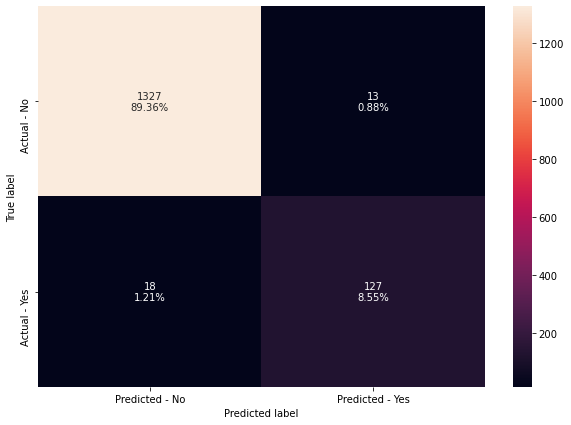

In [669]:
make_confusion_matrix(dTree,y_test)

In [670]:
# Performance Metrics for Model 1 - F1 Score on train and test
get_f1_score(dTree)

F1 Score on training set :  1.0
F1 Score on test set :  0.8912280701754385


## Visualizing the Decision Tree

In [671]:
feature_names = list(X.columns)
print(feature_names)

['const', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Education_Education_2_Graduate', 'Education_Education_3_Professional', 'Securities_Account_True', 'CD_Account_True', 'Online_True', 'CreditCard_True', 'County_Butte County', 'County_Contra Costa County', 'County_El Dorado County', 'County_Fresno County', 'County_Humboldt County', 'County_Imperial County', 'County_Kern County', 'County_Lake County', 'County_Los Angeles County', 'County_Marin County', 'County_Mendocino County', 'County_Merced County', 'County_Monterey County', 'County_Napa County', 'County_None', 'County_Orange County', 'County_Placer County', 'County_Riverside County', 'County_Sacramento County', 'County_San Benito County', 'County_San Bernardino County', 'County_San Diego County', 'County_San Francisco County', 'County_San Joaquin County', 'County_San Luis Obispo County', 'County_San Mateo County', 'County_Santa Barbara County', 'County_Santa Clara County', 'County_Santa Cruz County', 'County_Shasta Coun

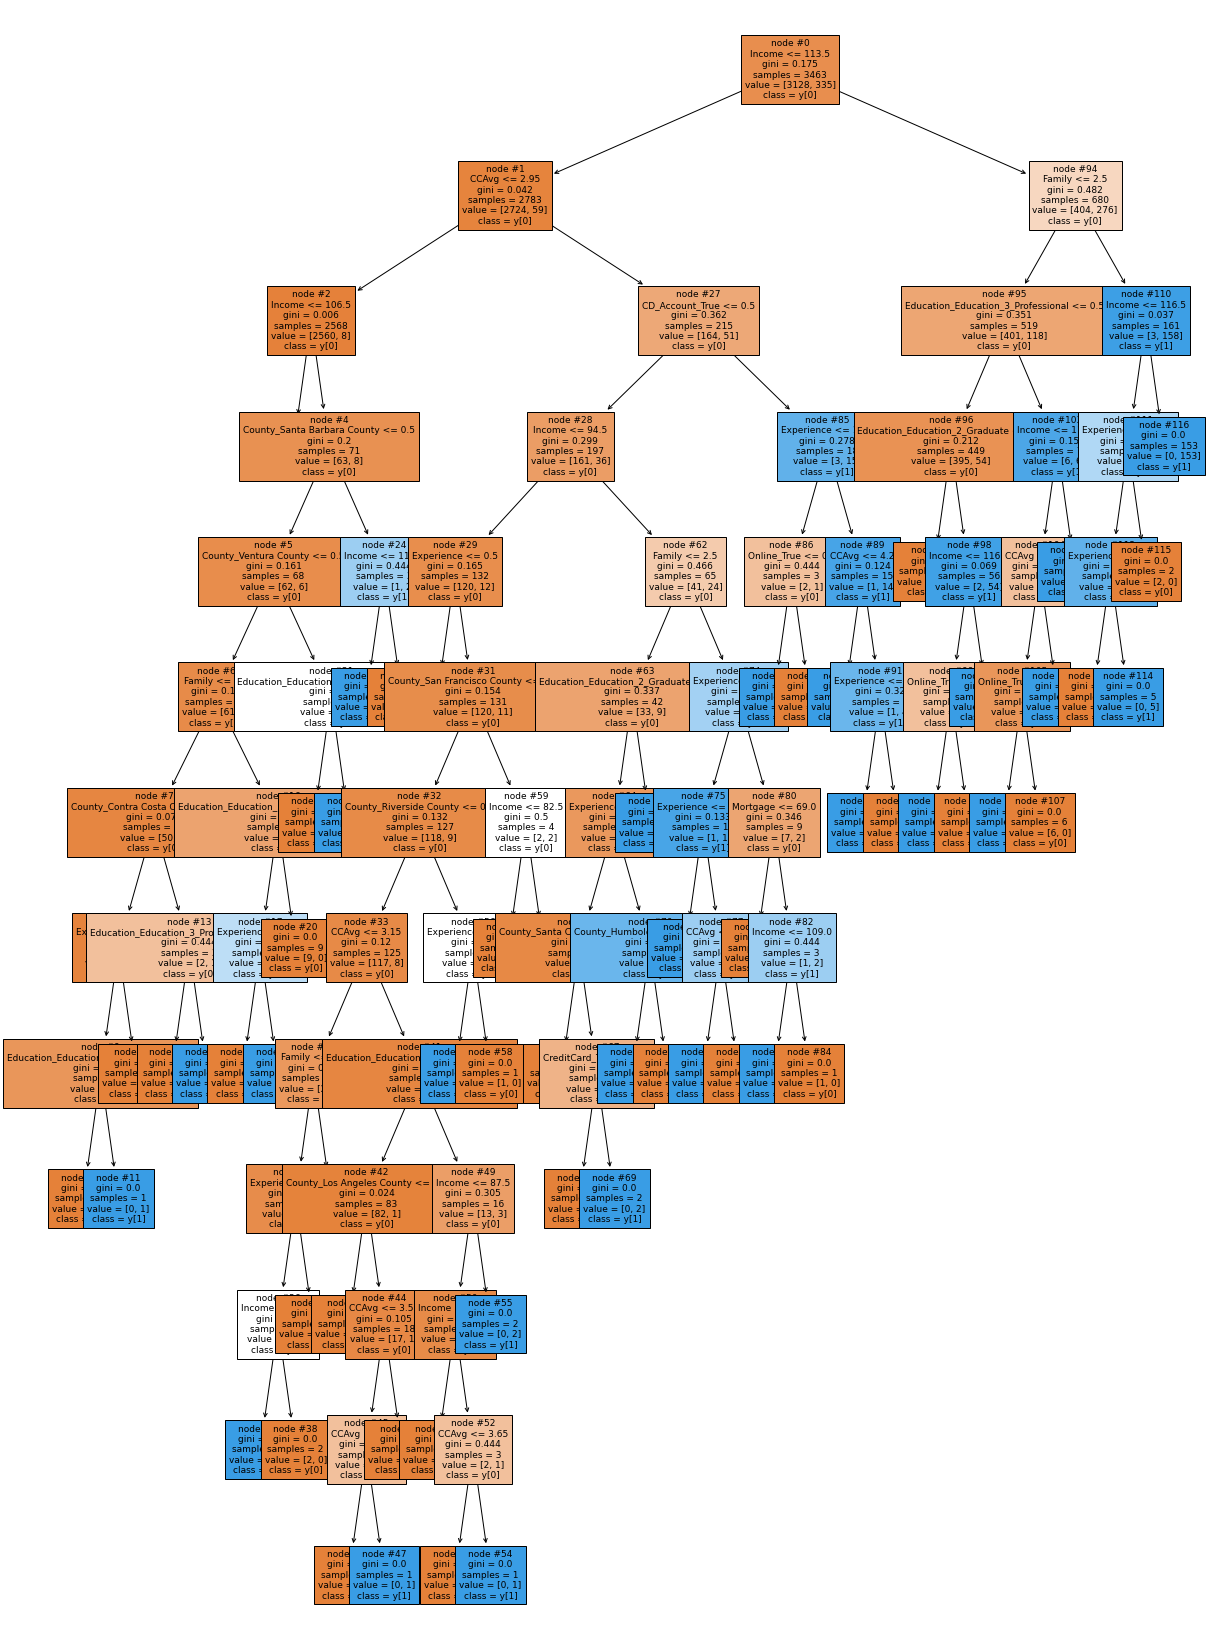

In [672]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

### Observation:

The decision tree above is extremely complex and therefore tends to overfit the model. We will prune it at later point so as to reduce overfitting

In [673]:
# Calculate the feature importances
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                         Imp
Income                              0.317385
Family                              0.246545
Education_Education_2_Graduate      0.163062
Education_Education_3_Professional  0.132204
CCAvg                               0.048550
Experience                          0.041155
CD_Account_True                     0.023071
Online_True                         0.007239
CreditCard_True                     0.004721
County_Santa Barbara County         0.003177
Mortgage                            0.002938
County_Humboldt County              0.002644
County_San Francisco County         0.002360
County_Santa Clara County           0.001500
County_Riverside County             0.001237
County_Ventura County               0.001155
County_Contra Costa County          0.000915
County_Los Angeles County           0.000144
County_San Joaquin County           0.000000
County_San Luis Obispo County       0.000000
County_San Mateo County             0.000000
County_San

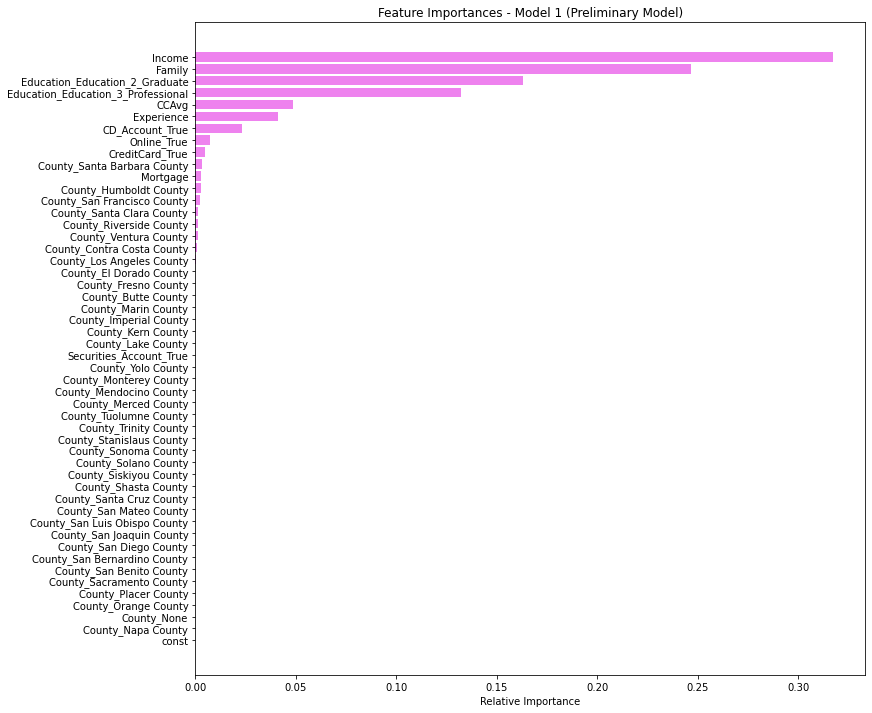

In [674]:
# Plot the feature importance on the bar plot

importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances - Model 1 (Preliminary Model)')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observation :
* Income and Family are the most important attributes in predicting if a customer will accept the loan.
* Education (Graduate and Professional) are next important attributes in making the prediction if a customer will accept the loan or not.

## Reducing over fitting
As established from the above visualization of the decision tree , we need to reduce the complexity to reduce overfitted model.

* In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits
  and it captures more information about the data and this is one of the root causes of overfitting
* Let's try Limiting the max_depth of tree to 5

## Model 2 - Pre-Pruning Using `max_depth` Parameter

In [675]:
# Build a decision tree by limit max_depth hyperparameter to 5
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=5,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

## Confusion Matrix - Decision Tree with depth restricted to 5

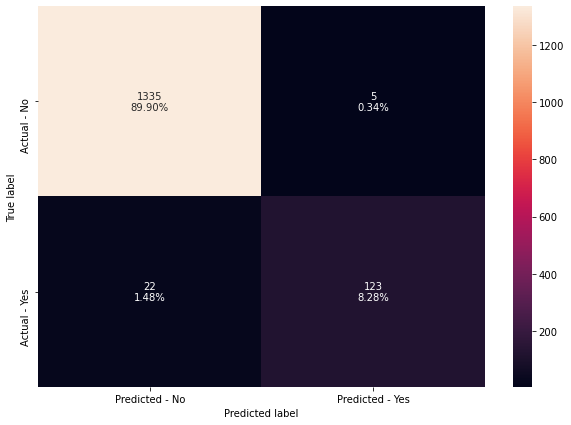

In [676]:
# Create confusion matrix
make_confusion_matrix(dTree1, y_test)

In [677]:
# Print Model 1 results for compairison
# Model 1 Performance metrics - F1 Score on train and test
print("\nPerformance Metric of Model 1 - Preliminary Model")
print("----------------------------------------------")
get_f1_score(dTree)

# Accuracy on train and test for model 2
print("\nPerformance metrics of Model 2 - (Pre-pruning Using max_depth)")
print("----------------------------------------------")
# F1 on train and test
get_f1_score(dTree1)


Performance Metric of Model 1 - Preliminary Model
----------------------------------------------
F1 Score on training set :  1.0
F1 Score on test set :  0.8912280701754385

Performance metrics of Model 2 - (Pre-pruning Using max_depth)
----------------------------------------------
F1 Score on training set :  0.9431643625192013
F1 Score on test set :  0.9010989010989011


### Observation:
* F1 score on the training set went down from 1 to 0.94 . This is to be expected since we are not overfitting anymore and have a more generalised model. 
* F1 score on the test set increased slightly from 0.89 to 0.90.

## Visualizing the Decision Tree


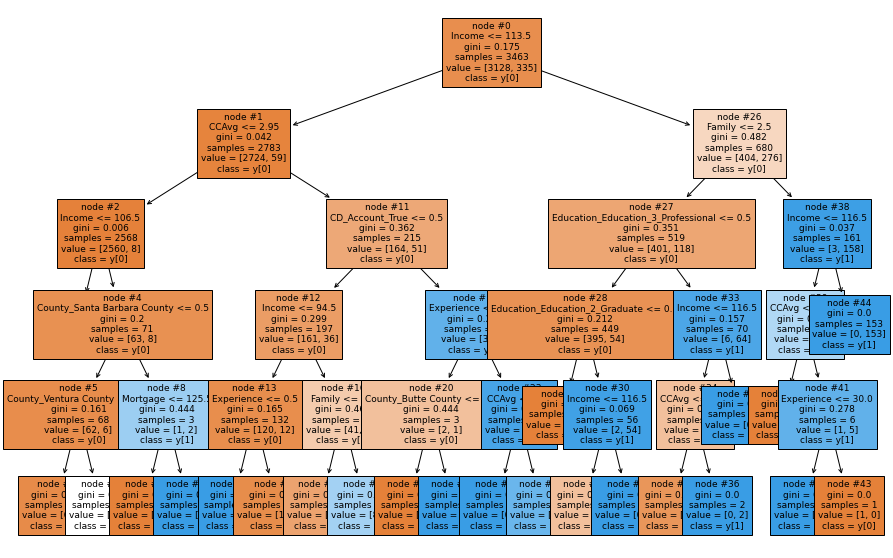

In [678]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [679]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2497.00, 0.00] class: False
|   |   |--- Income >  106.50
|   |   |   |--- County_Santa Barbara County <= 0.50
|   |   |   |   |--- County_Ventura County <= 0.50
|   |   |   |   |   |--- weights: [61.00, 5.00] class: False
|   |   |   |   |--- County_Ventura County >  0.50
|   |   |   |   |   |--- weights: [1.00, 1.00] class: False
|   |   |   |--- County_Santa Barbara County >  0.50
|   |   |   |   |--- Mortgage <= 125.50
|   |   |   |   |   |--- weights: [1.00, 0.00] class: False
|   |   |   |   |--- Mortgage >  125.50
|   |   |   |   |   |--- weights: [0.00, 2.00] class: True
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_True <= 0.50
|   |   |   |--- Income <= 94.50
|   |   |   |   |--- Experience <= 0.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: True
|   |   |   |   |--- Experience >  0.50
|   |   |   |   |   |--- weights: [120.00, 11.00] class: False
|   |   |   |--- 

The tree looks less complex and more understandable now

In [680]:
# Estimate feature importances
print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                         Imp
Income                              0.333358
Family                              0.266551
Education_Education_2_Graduate      0.167082
Education_Education_3_Professional  0.139965
CCAvg                               0.048352
CD_Account_True                     0.025592
Experience                          0.009407
County_Santa Barbara County         0.003524
County_Butte County                 0.002444
Mortgage                            0.002444
County_Ventura County               0.001281
County_Santa Clara County           0.000000
County_San Bernardino County        0.000000
County_San Diego County             0.000000
County_San Francisco County         0.000000
County_San Joaquin County           0.000000
County_San Luis Obispo County       0.000000
County_San Mateo County             0.000000
const                               0.000000
County_Sonoma County                0.000000
County_Santa Cruz County            0.000000
County_Sha

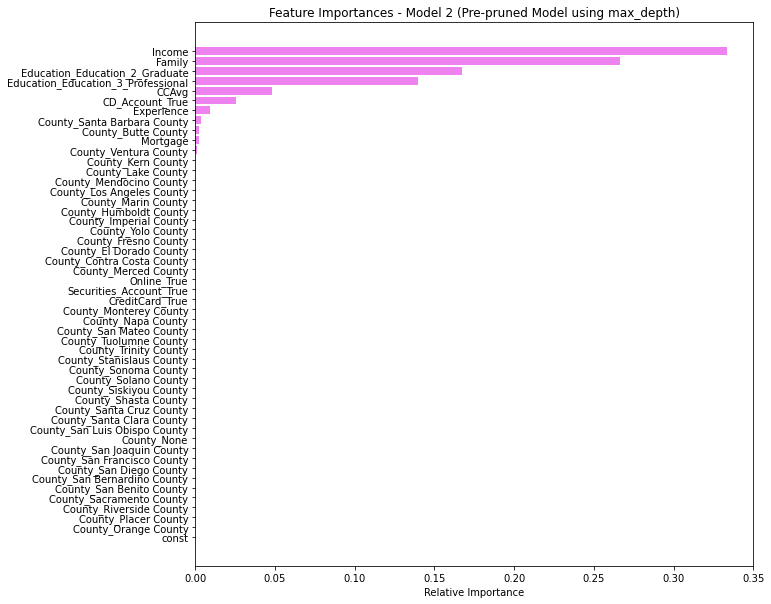

In [681]:
# Plot the feature importances on bar chart
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances - Model 2 (Pre-pruned Model using max_depth)')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The important features of Model 1 (Preliminary Model) and Model 2 (Pre-Pruned Model Using max_depth) have not changed. 
* We will use gridsearch to see if we can come up with optimum values of hyperparameters

## Model 3 - Using GridSearch for Hyperparameter tuning of our tree model

In [682]:
from sklearn.model_selection import GridSearchCV

In [683]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=5,
                       random_state=1)

## Confusion Matrix - decision tree with tuned hyperparameters

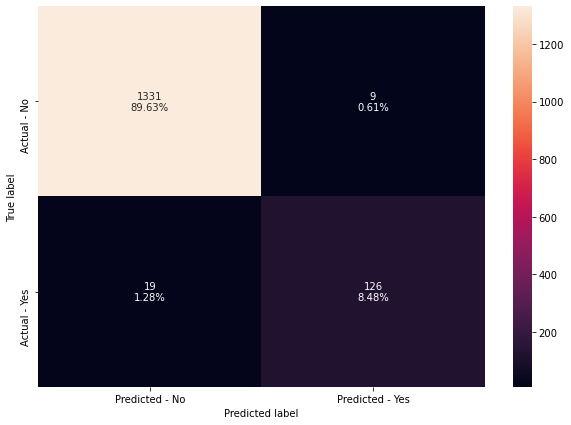

In [684]:
make_confusion_matrix(estimator,y_test)

In [686]:
# Print Model 2 and Model 3 results for comparision

# Accuracy on train and test for model 2
print("Performance metrics of Model 2 - (Pre-pruning Using max_depth)")
print("----------------------------------------------")
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# F1 on train and test
get_f1_score(dTree1)


# Accuracy on train and test for Model 3 - Hyperparameter Tuning using GridSearch
print("\nPerformance Metrics of Model 3 - hyperparameter tuning using gridsearch")
print ("-------------------------------------------------------------------")
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# F1 Score on train and test
get_f1_score(estimator)



Performance metrics of Model 2 - (Pre-pruning Using max_depth)
----------------------------------------------
Accuracy on training set :  0.9893156222928097
Accuracy on test set :  0.9818181818181818
F1 Score on training set :  0.9431643625192013
F1 Score on test set :  0.9010989010989011

Performance Metrics of Model 3 - hyperparameter tuning using gridsearch
-------------------------------------------------------------------
Accuracy on training set :  0.9861391856771585
Accuracy on test set :  0.9811447811447811
F1 Score on training set :  0.9266055045871558
F1 Score on test set :  0.9


* The performance of the model has not changed much for the better,after hyperparameter tuning, compared to Pre-pruning with max_depth = 5

## Visualizing the Decision Tree

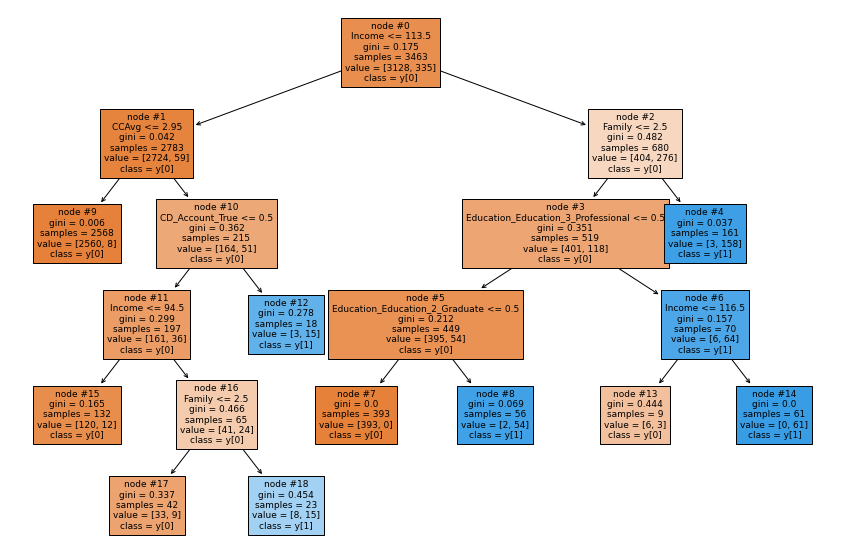

In [687]:
# Plot the Decision tree after hyperparameter tuning with max_depth=5
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [688]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2560.00, 8.00] class: False
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_True <= 0.50
|   |   |   |--- Income <= 94.50
|   |   |   |   |--- weights: [120.00, 12.00] class: False
|   |   |   |--- Income >  94.50
|   |   |   |   |--- Family <= 2.50
|   |   |   |   |   |--- weights: [33.00, 9.00] class: False
|   |   |   |   |--- Family >  2.50
|   |   |   |   |   |--- weights: [8.00, 15.00] class: True
|   |   |--- CD_Account_True >  0.50
|   |   |   |--- weights: [3.00, 15.00] class: True
|--- Income >  113.50
|   |--- Family <= 2.50
|   |   |--- Education_Education_3_Professional <= 0.50
|   |   |   |--- Education_Education_2_Graduate <= 0.50
|   |   |   |   |--- weights: [393.00, 0.00] class: False
|   |   |   |--- Education_Education_2_Graduate >  0.50
|   |   |   |   |--- weights: [2.00, 54.00] class: True
|   |   |--- Education_Education_3_Professional >  0.50
|   |   |   |--- Income <= 116.50
|   |   |   |   |--

In [689]:
# Estimate the feature importances of model 3

print("\nFeature Importance - Model 3 - Hyperparameter Grid search")
print("---------------------------------------------------------")
print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased


Feature Importance - Model 3 - Hyperparameter Grid search
---------------------------------------------------------
                                         Imp
Income                              0.334775
Family                              0.277471
Education_Education_2_Graduate      0.173926
Education_Education_3_Professional  0.145700
CCAvg                               0.041488
CD_Account_True                     0.026640
const                               0.000000
County_San Francisco County         0.000000
County_San Mateo County             0.000000
County_San Luis Obispo County       0.000000
County_San Joaquin County           0.000000
County_San Benito County            0.000000
County_San Diego County             0.000000
County_San Bernardino County        0.000000
County_Santa Clara County           0.000000
County_Sacramento County            0.000000
County_Santa Barbara County         0.000000
County_Siskiyou County              0.000000
County_Santa Cruz County    

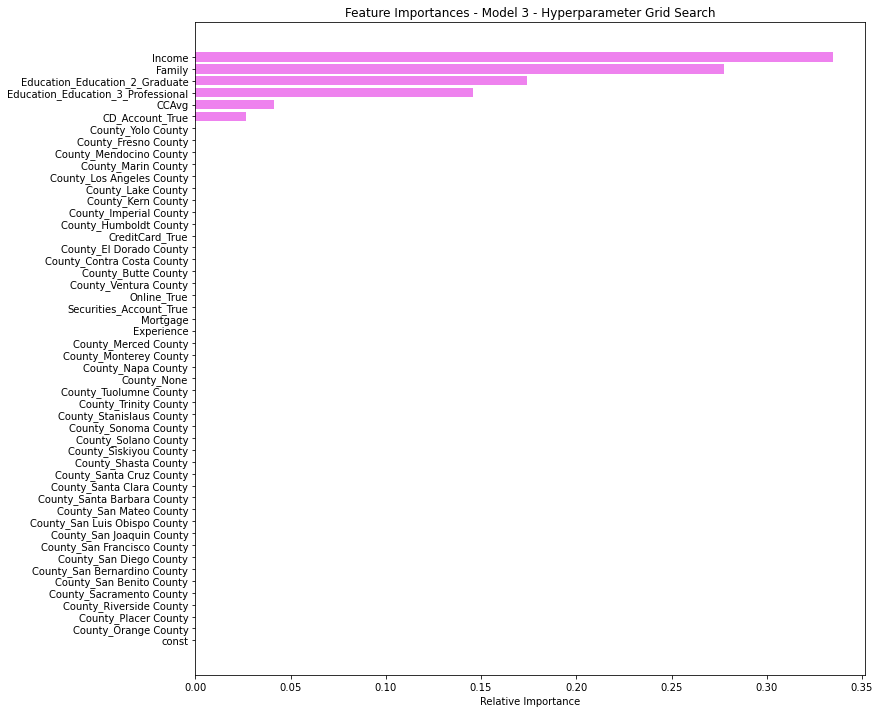

In [690]:
# Plot the feature importances on graph

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances - Model 3 - Hyperparameter Grid Search')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The feature importances of all previous models seems to stay the same,implying that these are obvious critical parameters that drive the model.

* We will next evaluate post pruning method , in case we might have neglected some hyperparameters

## Model 4 - Cost Complexity Pruning

In [691]:
# Build the model and get the alpha and impurities
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [692]:
# print the alphas and impurities
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000190    0.000571
2     0.000268    0.001107
3     0.000268    0.001643
4     0.000270    0.002182
5     0.000278    0.003293
6     0.000289    0.003582
7     0.000289    0.003870
8     0.000385    0.004255
9     0.000385    0.004640
10    0.000385    0.005025
11    0.000385    0.005410
12    0.000440    0.007170
13    0.000462    0.007633
14    0.000481    0.008114
15    0.000490    0.013019
16    0.000495    0.013514
17    0.000513    0.014027
18    0.000520    0.014547
19    0.000531    0.015608
20    0.000544    0.016695
21    0.000602    0.017297
22    0.000617    0.017914
23    0.000660    0.018574
24    0.000729    0.019303
25    0.001267    0.021838
26    0.001579    0.023416
27    0.001646    0.025062
28    0.001948    0.027011
29    0.002013    0.029024
30    0.004032    0.033056
31    0.006279    0.039334
32    0.024186    0.087707
33    0.040347    0.128054
34    0.046704    0.174758

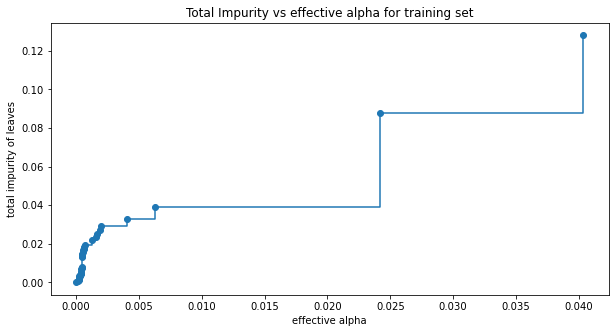

In [693]:
# Plot the Total Impurity vs effective alpha for training set

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. 

In [694]:
# Train the decision tree using the ccp_alpha

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0467037050176459



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node.

In [695]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

Accuracy vs Alpha for training and testing sets
----------------------------------------------------


In [696]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

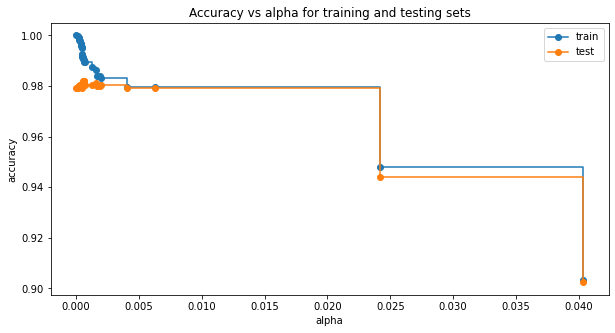

In [697]:
# Plot the Accuracy vs alpha for training and testing sets

fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [698]:
# Get the accuracy of the best model (max test score) and print the best model accuracy 

index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0005435613459937831, random_state=1)
Training accuracy of best model:  0.9907594571181056
Test accuracy of best model:  0.9818181818181818


#### As already established in earlier section, accuracy isn't the right metric for our data and we would want high f1 score

In [699]:
# Calculate the f1_score for the training data set 
f1_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=f1_score(y_train,pred_train3)
    f1_train.append(values_train)

In [700]:
# Calculate the f1_score for the training data set 
f1_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=f1_score(y_test,pred_test3)
    f1_test.append(values_test)

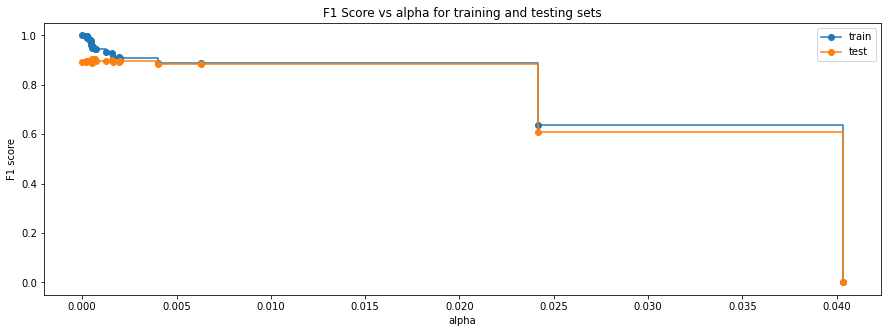

In [701]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [702]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006015978438733275, random_state=1)


## Confusion Matrix - post-pruned decision tree

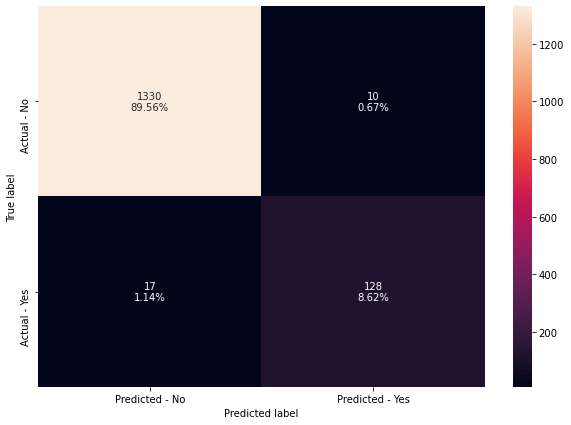

In [703]:
make_confusion_matrix(best_model,y_test)

In [705]:
# Print performance metrics of all 4 models 

# Print Model 1 results for compairison
# F1 Score on train and test
print("Performance Metric of Model 1 - Preliminary Model")
print("----------------------------------------------")
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))
get_f1_score(dTree)

# Accuracy on train and test for model 2
print("\nPerformance metrics of Model 2 - Pre-pruning Using max_depth")
print("----------------------------------------------")
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# F1 on train and test
get_f1_score(dTree1)

# Performance metrics of train and test for Model 3 - Hyperparameter Tuning using GridSearch
print("\nPerformance Metrics of Model 3 - hyperparameter tuning using gridsearch")
print ("-------------------------------------------------------------------")
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# F1 Score on train and test
get_f1_score(estimator)

# Performance metrics of train and test for Model 4 - Cost Complexity Pruning
print("\nPerformance metrics for Model 4 - Cost Complexity Pruning")
print("-----------------------------------------------------")
print("Accuracy on training set : ",best_model.score(X_train, y_train))
print("Accuracy on test set : ",best_model.score(X_test, y_test))
get_f1_score(best_model)

Performance Metric of Model 1 - Preliminary Model
----------------------------------------------
Accuracy on training set :  1.0
Accuracy on test set :  0.9791245791245792
F1 Score on training set :  1.0
F1 Score on test set :  0.8912280701754385

Performance metrics of Model 2 - Pre-pruning Using max_depth
----------------------------------------------
Accuracy on training set :  0.9893156222928097
Accuracy on test set :  0.9818181818181818
F1 Score on training set :  0.9431643625192013
F1 Score on test set :  0.9010989010989011

Performance Metrics of Model 3 - hyperparameter tuning using gridsearch
-------------------------------------------------------------------
Accuracy on training set :  0.9861391856771585
Accuracy on test set :  0.9811447811447811
F1 Score on training set :  0.9266055045871558
F1 Score on test set :  0.9

Performance metrics for Model 4 - Cost Complexity Pruning
-----------------------------------------------------
Accuracy on training set :  0.990181923187987

**Observation:**

* **With post-pruning we get the highest F1 Score on both training and test set**

## Visualizing the Decision Tree

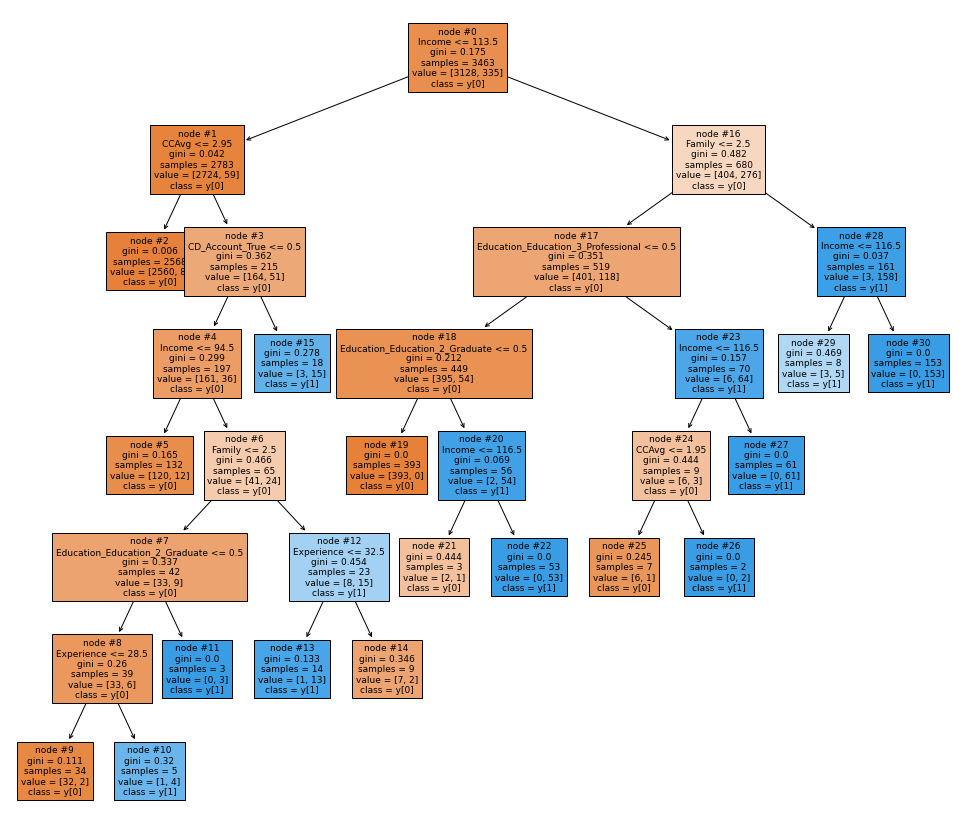

In [706]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [707]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2560.00, 8.00] class: False
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_True <= 0.50
|   |   |   |--- Income <= 94.50
|   |   |   |   |--- weights: [120.00, 12.00] class: False
|   |   |   |--- Income >  94.50
|   |   |   |   |--- Family <= 2.50
|   |   |   |   |   |--- Education_Education_2_Graduate <= 0.50
|   |   |   |   |   |   |--- Experience <= 28.50
|   |   |   |   |   |   |   |--- weights: [32.00, 2.00] class: False
|   |   |   |   |   |   |--- Experience >  28.50
|   |   |   |   |   |   |   |--- weights: [1.00, 4.00] class: True
|   |   |   |   |   |--- Education_Education_2_Graduate >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 3.00] class: True
|   |   |   |   |--- Family >  2.50
|   |   |   |   |   |--- Experience <= 32.50
|   |   |   |   |   |   |--- weights: [1.00, 13.00] class: True
|   |   |   |   |   |--- Experience >  32.50
|   |   |   |   |   |   |--- weights: [7.00, 2.00] class: False
|   

In [708]:
# Get the feature importances for the best model

dt_feature_importances = pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)
print(dt_feature_importances)

# print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                         Imp
Income                              0.330314
Family                              0.266687
Education_Education_2_Graduate      0.174482
Education_Education_3_Professional  0.140037
CCAvg                               0.044067
CD_Account_True                     0.025605
Experience                          0.018808
County_San Francisco County         0.000000
County_San Mateo County             0.000000
County_San Luis Obispo County       0.000000
County_San Joaquin County           0.000000
const                               0.000000
County_San Diego County             0.000000
County_San Bernardino County        0.000000
County_Santa Clara County           0.000000
County_San Benito County            0.000000
County_Santa Barbara County         0.000000
County_Siskiyou County              0.000000
County_Santa Cruz County            0.000000
County_Shasta County                0.000000
County_Riverside County             0.000000
County_Sol

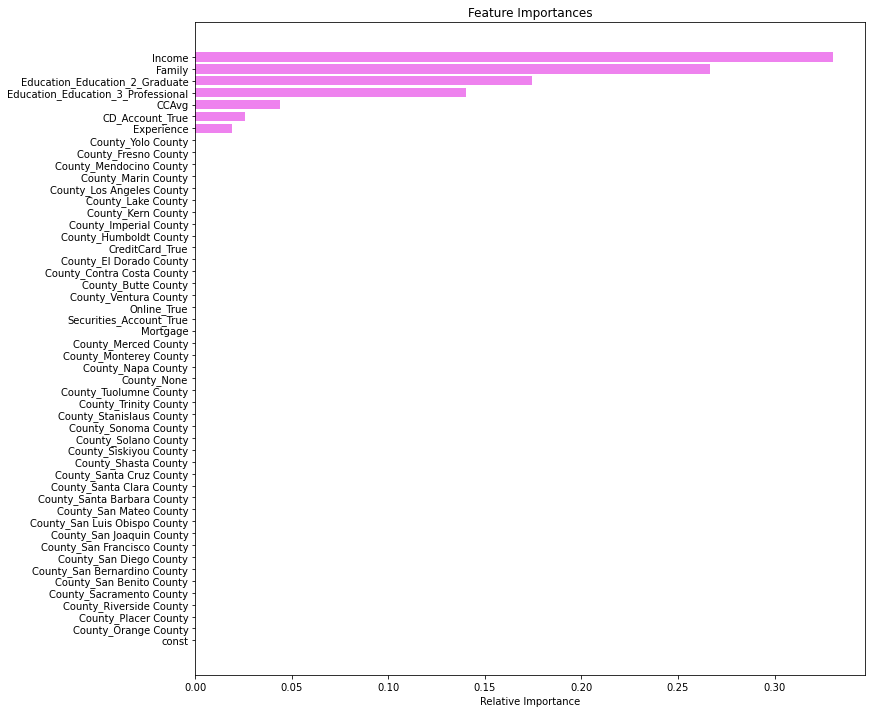

In [709]:
# Visualize the feature importances fo the best model

importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Income, Family size, Education (graduate and professional) are the most important features.

### Summary of Decision Tree Model:

In [710]:
comparison_frame = pd.DataFrame({'Model No.':['Model 1' , 'Model 2' , 'Model 3' , 'Model 4'],'Model Name':['Initial Decision Tree model','Decision Tree - restricted maximum depth','Decision Tree - hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_F1_Score':[1,0.94,0.92,0.95], 'Test_F1_Score':[0.89,0.90,0.90,0.90]}) 
print("\nSummary of Decision Tree Models")
print("-------------------------------")
print(comparison_frame)


Summary of Decision Tree Models
-------------------------------
  Model No.                                Model Name  Train_F1_Score  \
0   Model 1               Initial Decision Tree model            1.00   
1   Model 2  Decision Tree - restricted maximum depth            0.94   
2   Model 3     Decision Tree - hyperparameter tuning            0.92   
3   Model 4           Decision tree with post-pruning            0.95   

   Test_F1_Score  
0           0.89  
1           0.90  
2           0.90  
3           0.90  



**Model 4 , Decision tree with post-pruning, produces the best combination of F1 Score on test set and train set. We will consider this model as our final model**

### <a id='link1'>Comparision of Logistic Regression Vs Decision Tree Model</a>

### 1. Feature Importances - Decision Tree Vs Logistic Regression :

In [711]:
# Print the features importances based on Decision Tree Vs Logistic Regression
combined_feature_importances = pd.concat([dt_model_feature_importances, lg_model_feature_importances], axis=1, join="outer")
combined_feature_importances.rename(columns = {'Imp': 'Decision_Tree' , 0 :'Logistic_Regression'} , inplace=True)
print(combined_feature_importances)

                                    Decision_Tree  Logistic_Regression
Income                                   0.330314             0.059085
Family                                   0.266687             0.578179
Education_Education_2_Graduate           0.174482             3.785787
Education_Education_3_Professional       0.140037             3.811852
CCAvg                                    0.044067             0.153516
CD_Account_True                          0.025605             3.903719
Experience                               0.018808                  NaN
const                                         NaN           -12.584814
CreditCard_True                               NaN            -1.165051
Securities_Account_True                       NaN            -0.763378
Online_True                                   NaN            -0.732707


### 2. F1 Score - Decision Tree Vs Logistic Regression:

In [712]:
# Display the F1 score for Decision Tree Vs Logistics Regression
f1_comparison_frame = pd.DataFrame({'Classification_Type': ['Decision Tree with Post-pruning', 'Logistic Regression - 0.32 Threshold'], 'Train_F1_Score' : [0.95, 0.77], 'Test_F1_Score':[0.90,0.78]})
f1_comparison_frame

Classification_Type  Train_F1_Score  Test_F1_Score
0       Decision Tree with Post-pruning            0.95           0.90
1  Logistic Regression - 0.32 Threshold            0.77           0.78

### Conclusion & Recommendation

* We have been able to build a Logistic Regression and Decision Tree predictive models that can be used by the bank to identify customers who are more likely to accept the loan. The F1 score for the Logistic regression model is 0.77 and 0.78 on training and testing data and F1 score for Decision tree model is 0.95 and 0.90 on training and testing data respectively.

* Both the models have been generalized to fit the training and testing data.

* Looking at the feature importances for both decision tree and logistic regression, both the models have identified Income, Family, Education (Graduate and professional) to be the most importance features. I recommend the bank to look for these attributes when identifying customers who could be targetted for the marketing campaign.

* I recommend using the Decision tree model for making predictions since this methdology results in highest F1 score and the features importances for decision metrics are aligned with out intuition of what attributes are more important.